<a href="https://colab.research.google.com/github/aktrikx/DSprojects/blob/main/House_Price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOUSE PRICE ADVANCE REGRESSION


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
train=pd.read_csv('/content/drive/My Drive/houseprice/train.csv')
data=train
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

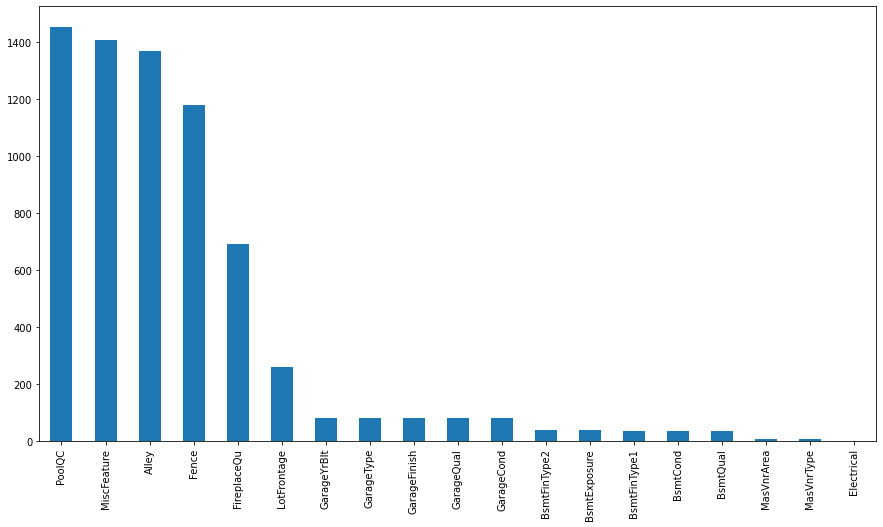

In [ ]:
missing= data.isnull().sum()
missing=(missing[missing>0]).sort_values(ascending=False)
plt.figure(figsize=(15,8))
missing.plot.bar()

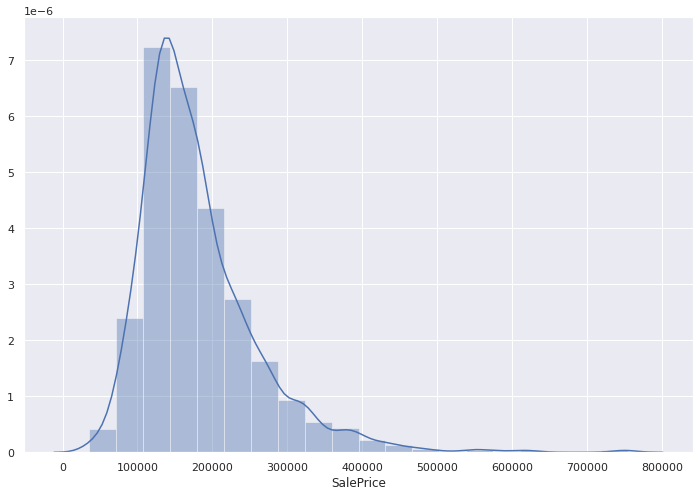

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(data['SalePrice'],kde=True,bins=20)

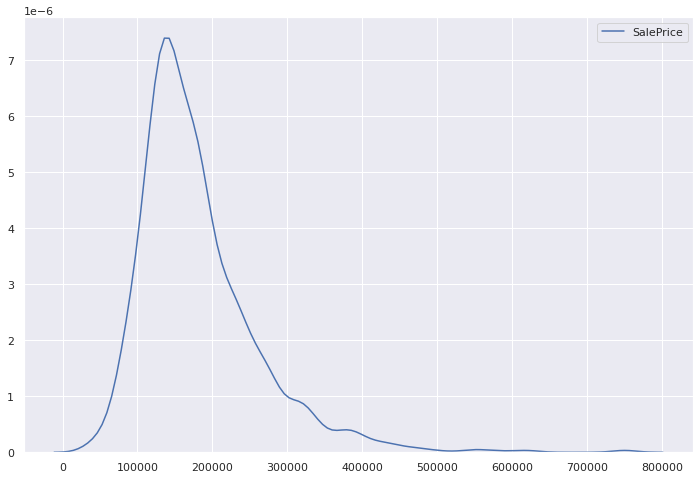

In [ ]:
sns.kdeplot(data['SalePrice'])

In [ ]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Correlation

In [ ]:
numeric_features=data.select_dtypes(include=[np.number])
len(numeric_features.columns)

38

In [ ]:
catogorical_features=data.select_dtypes(include=[np.object])
len(catogorical_features.columns)

43

In [ ]:
correlation=numeric_features.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

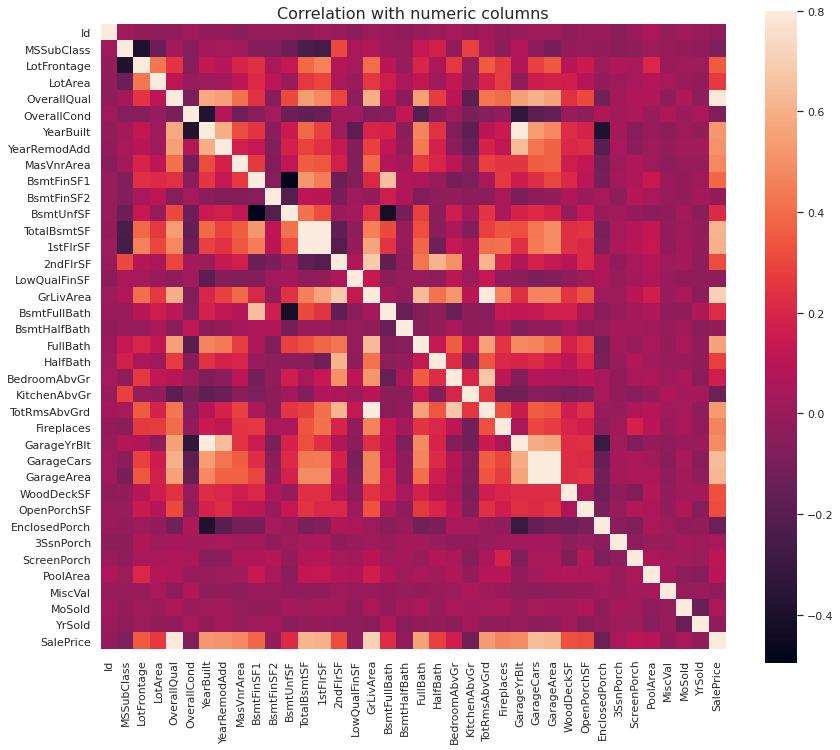

In [ ]:
f,ax=plt.subplots(figsize=(14,12))
plt.title('Correlation with numeric columns',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

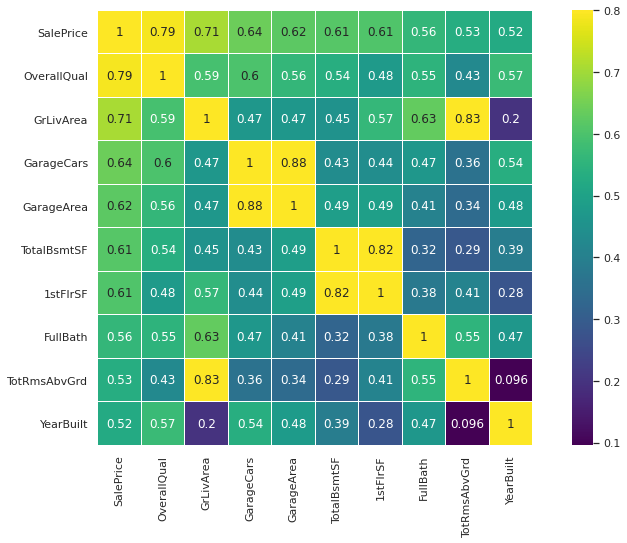

In [ ]:
k=10
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
# print(cols)
cm=np.corrcoef(data[cols].values.T)
f,ax=plt.subplots(figsize=(14,8))
sns.heatmap(cm,vmax=0.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor='white',xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

In [ ]:
correlation=catogorical_features.corr()
# correlation['SalePrice'].sort_values(ascending=False)
correlation.columns

Index([], dtype='object')

In [ ]:
len(numeric_features.columns.(numeric_features['SalePrice']))

38

In [ ]:
new_cols = numeric_features.drop(['SalePrice'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

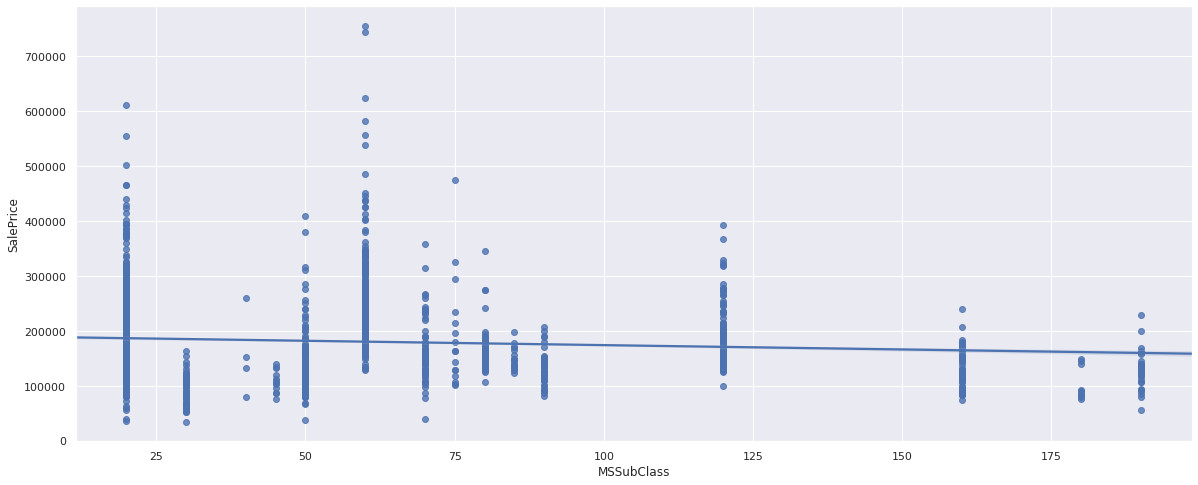

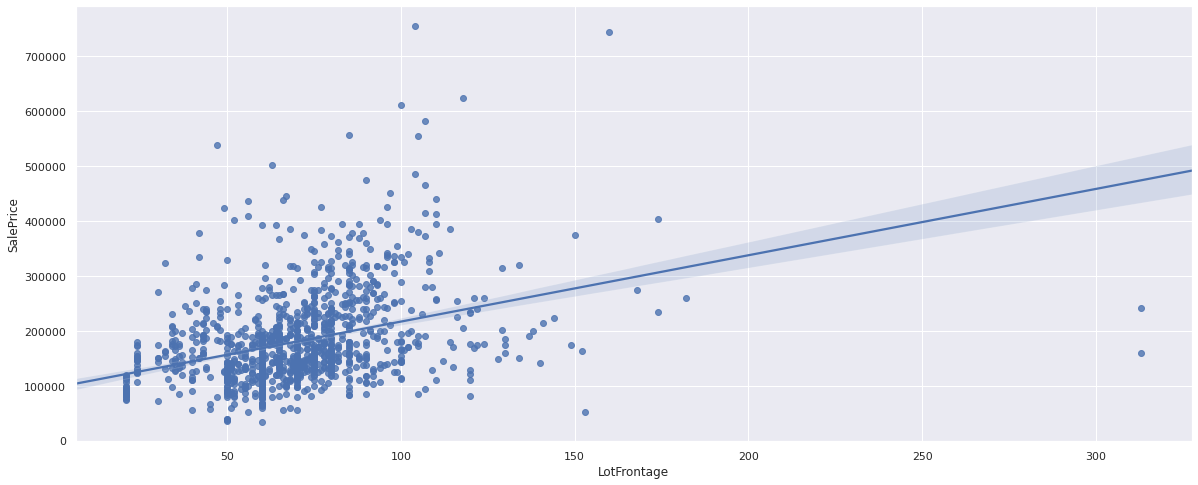

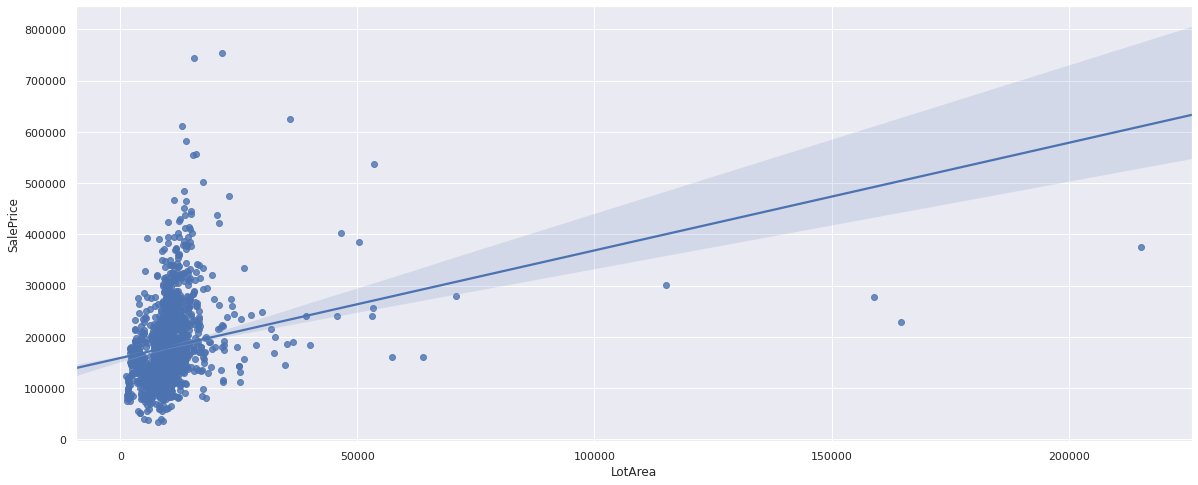

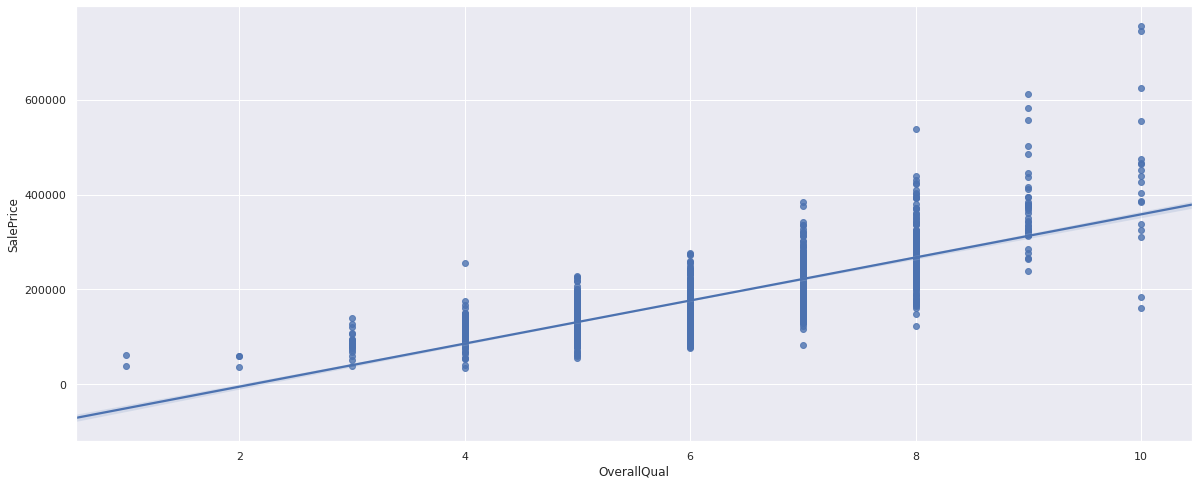

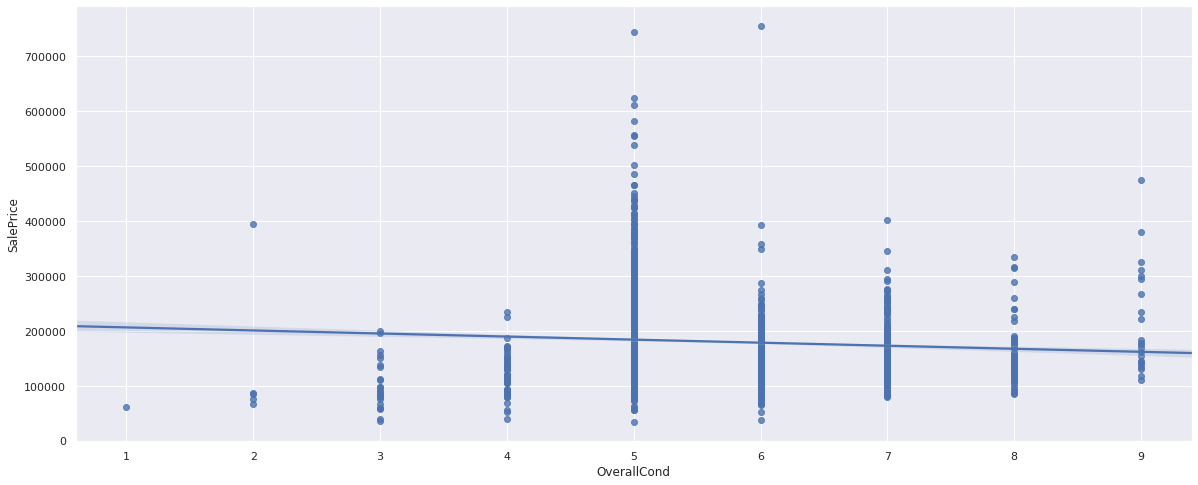

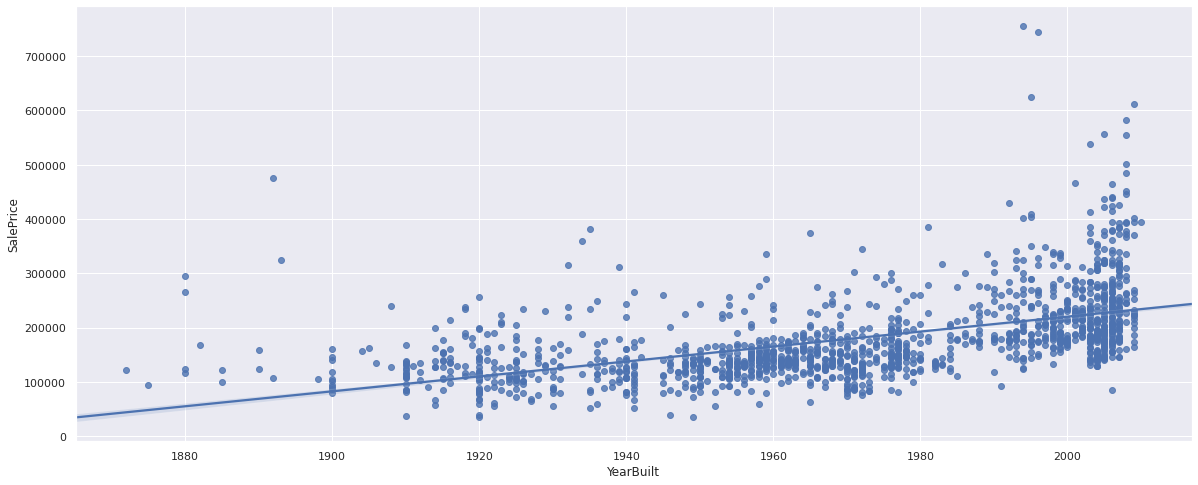

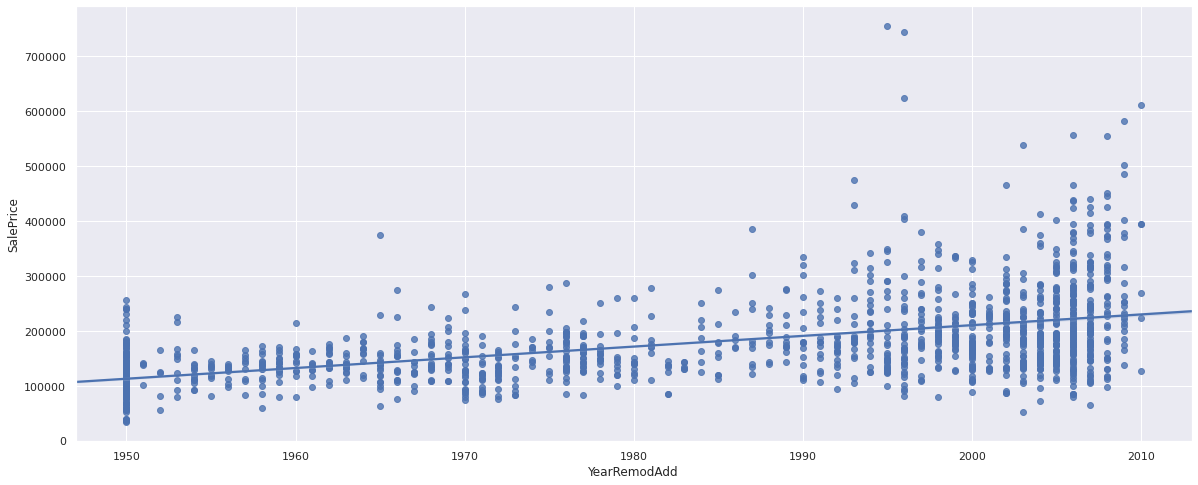

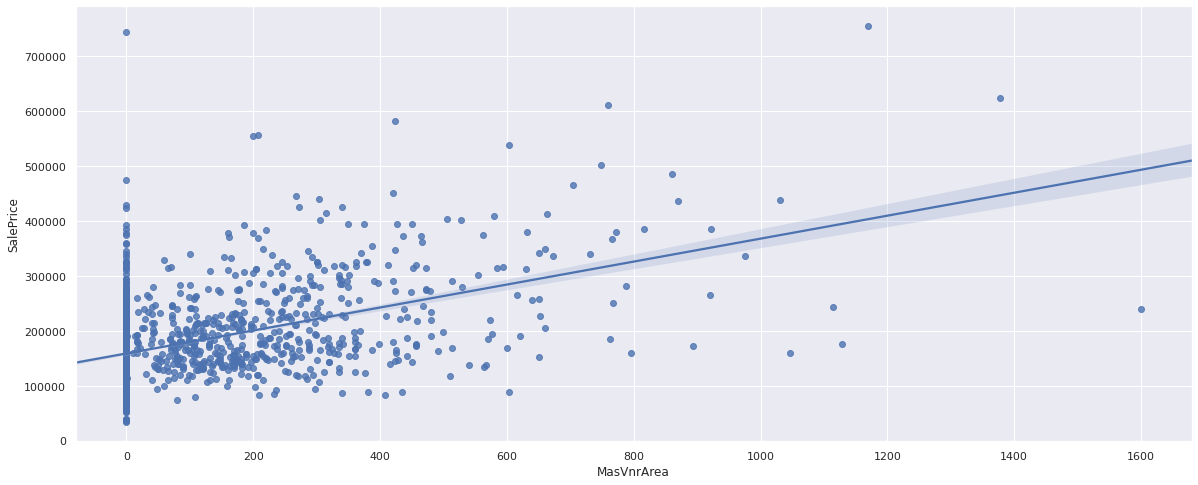

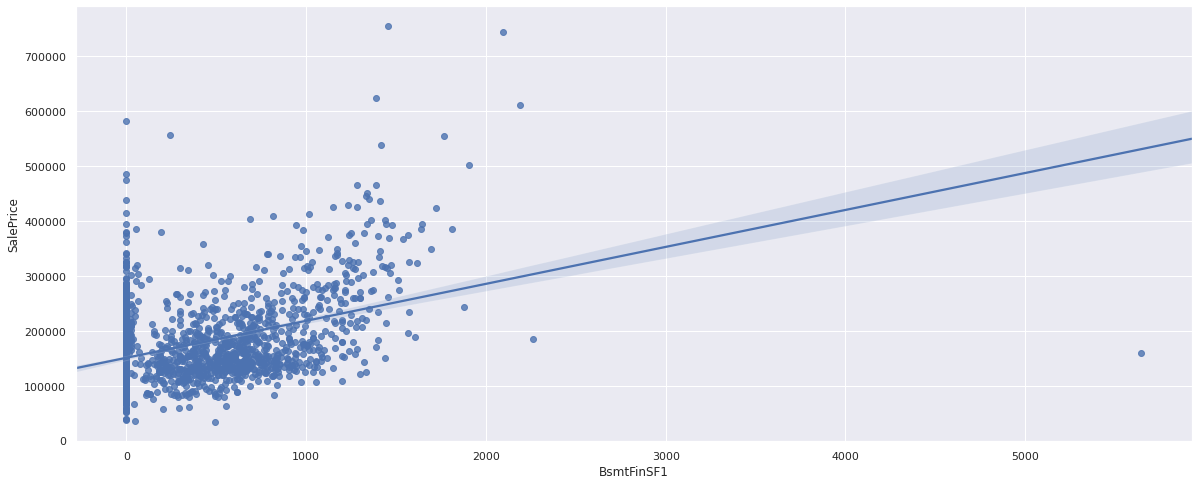

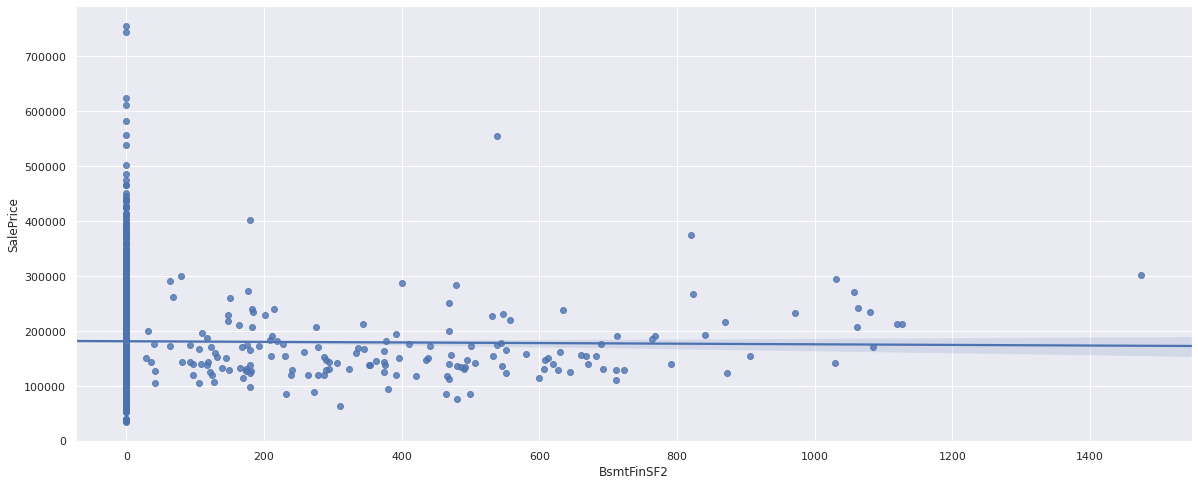

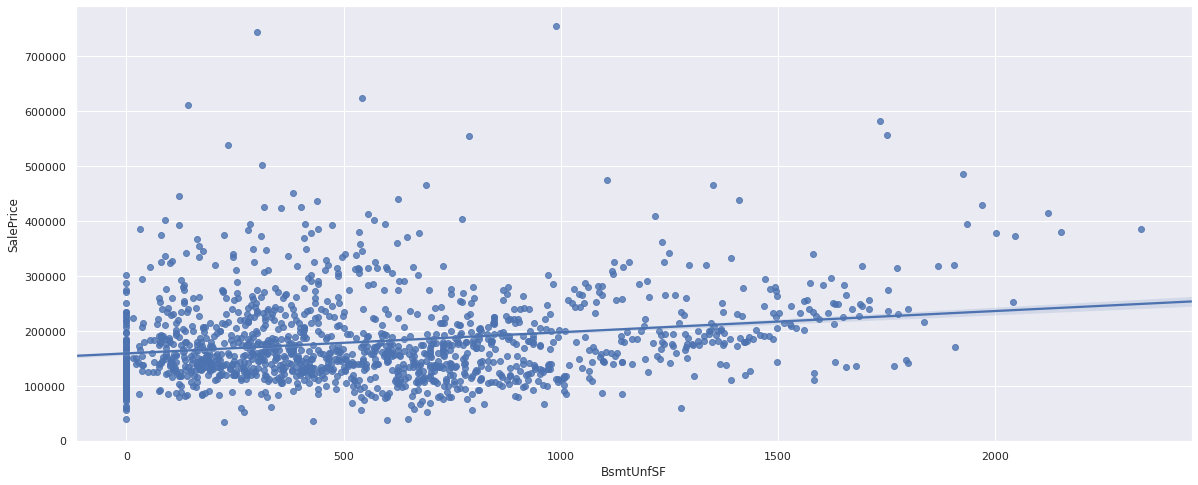

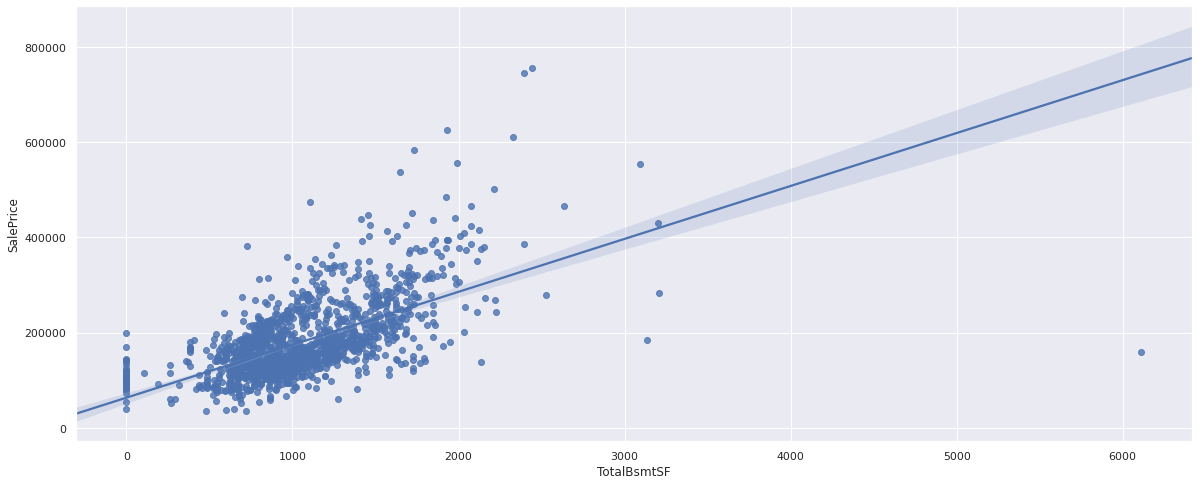

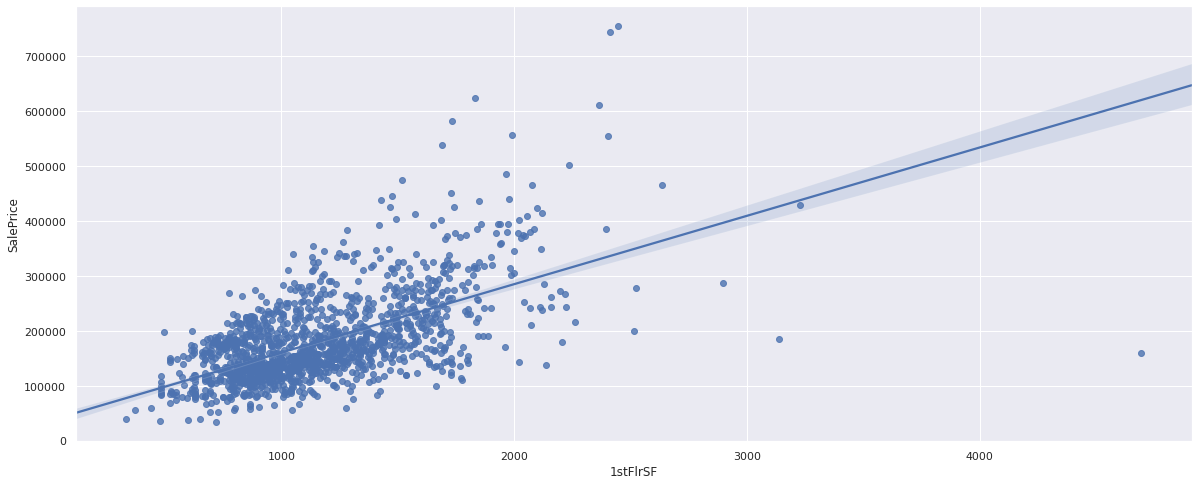

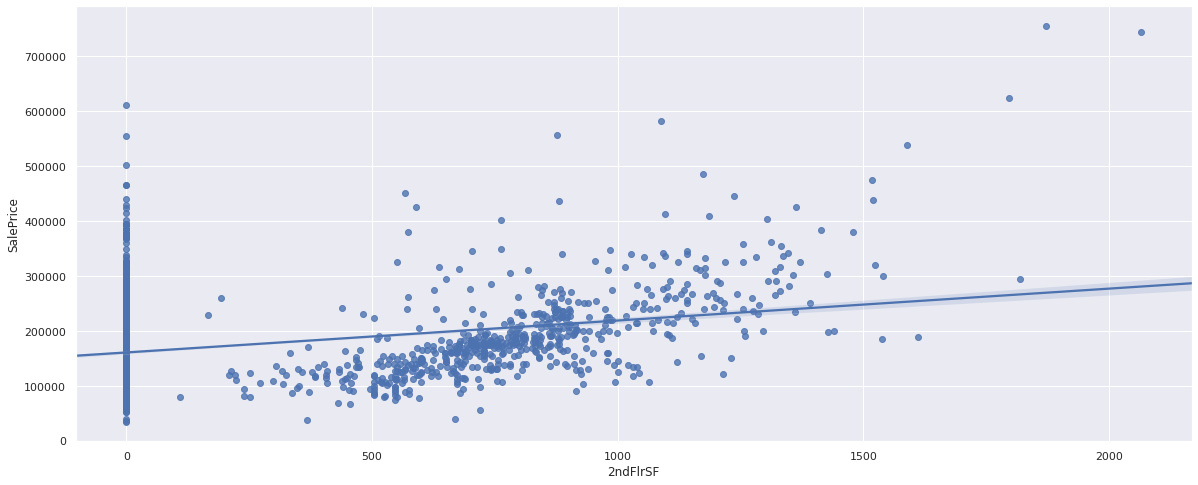

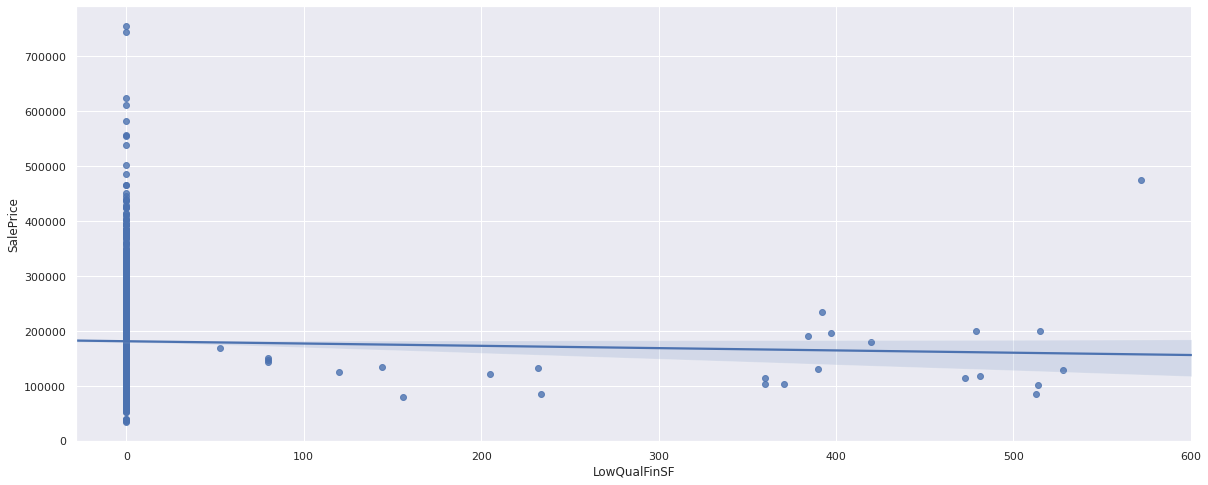

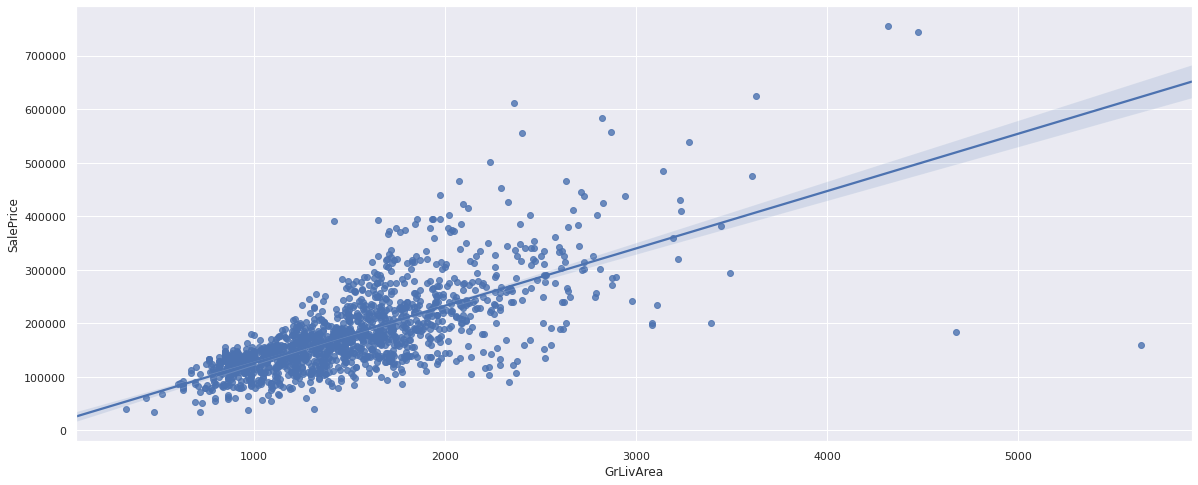

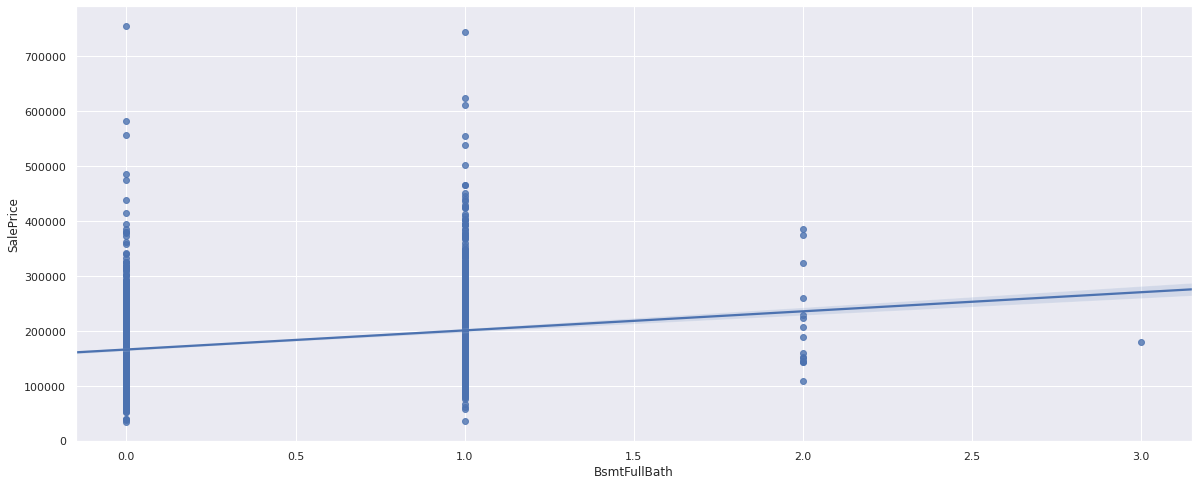

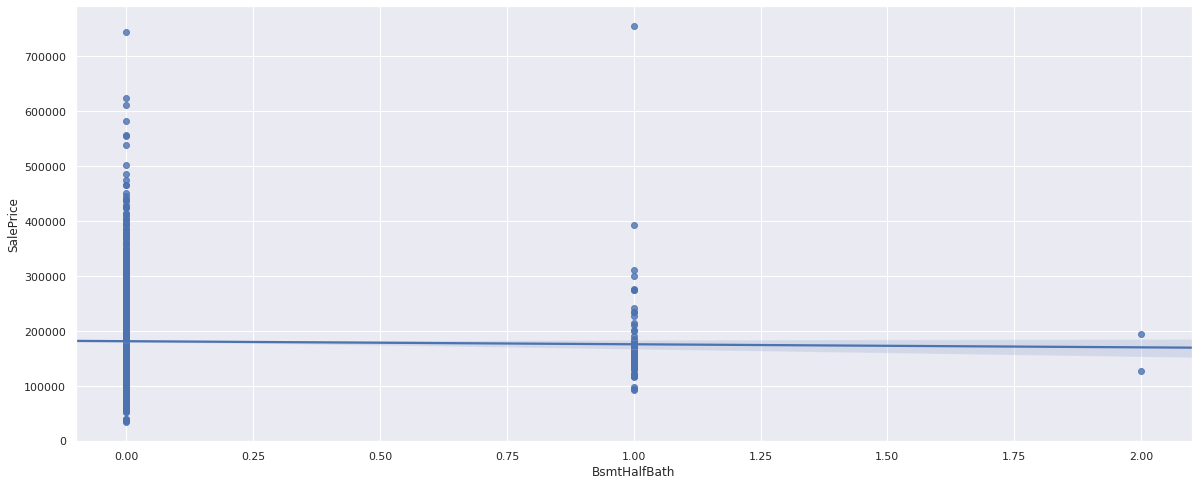

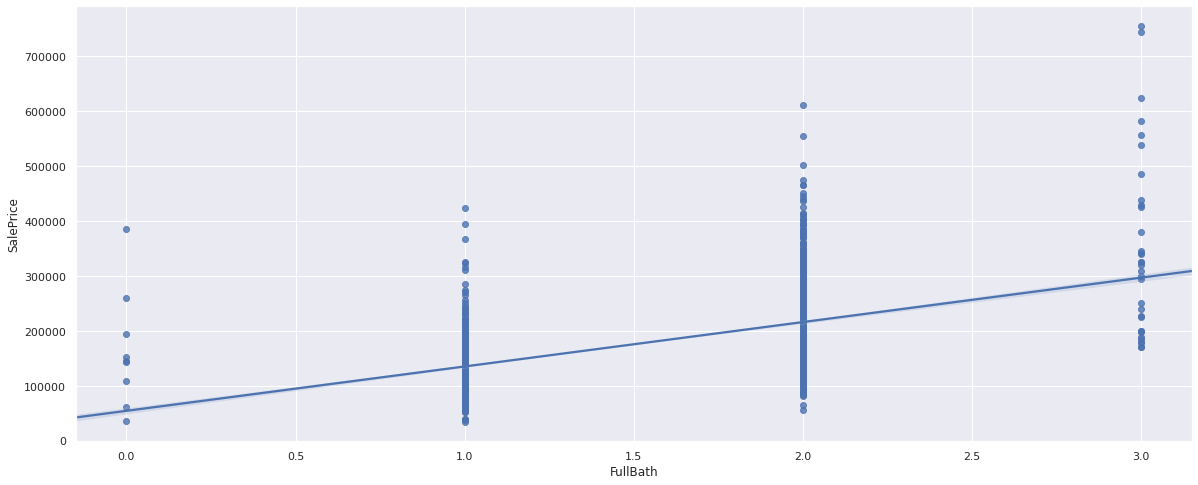

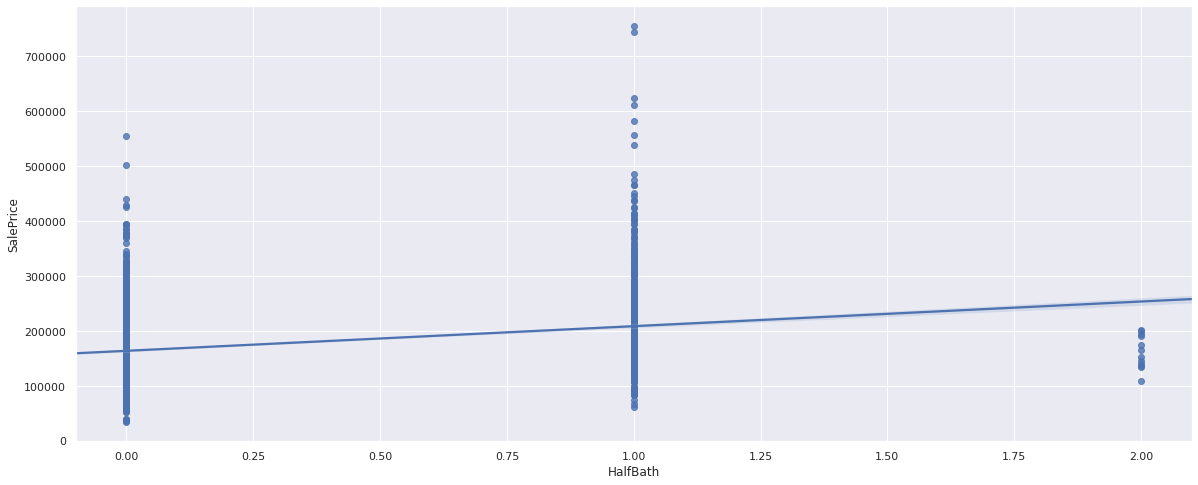

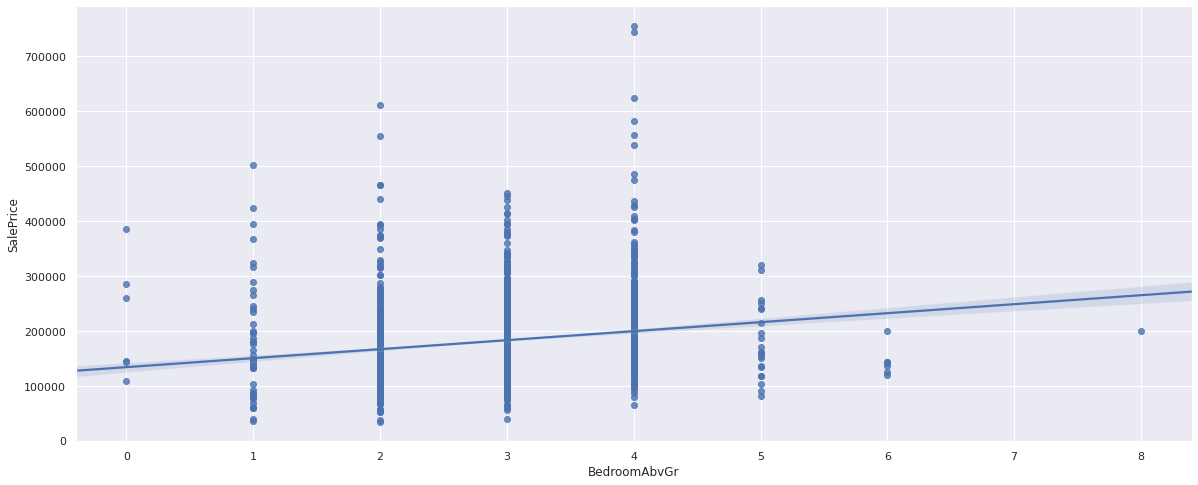

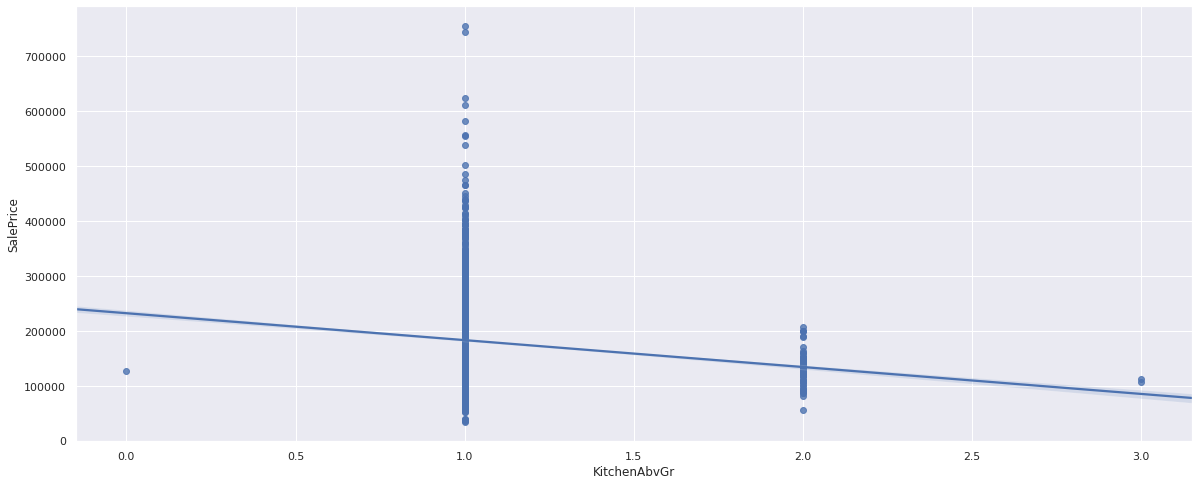

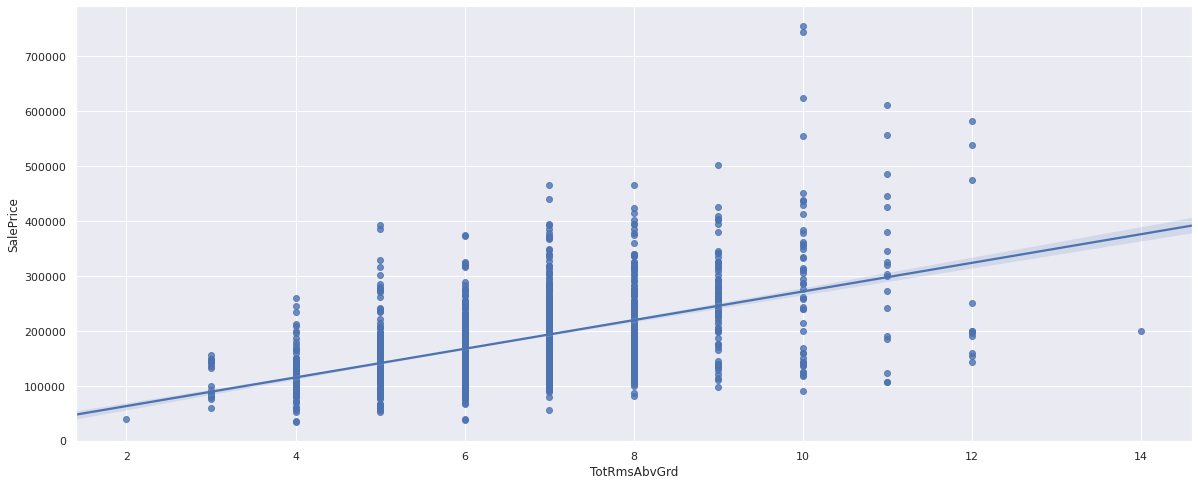

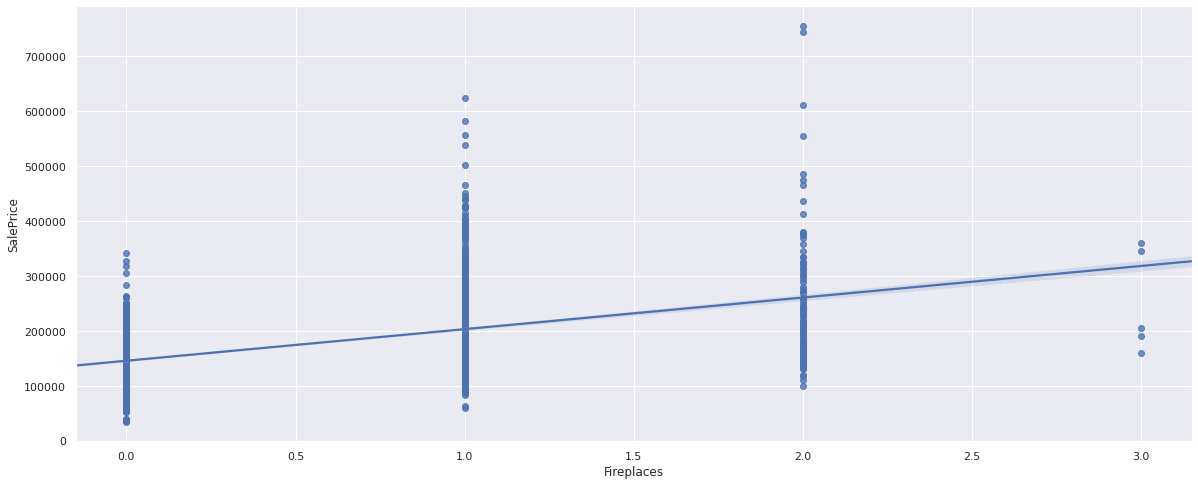

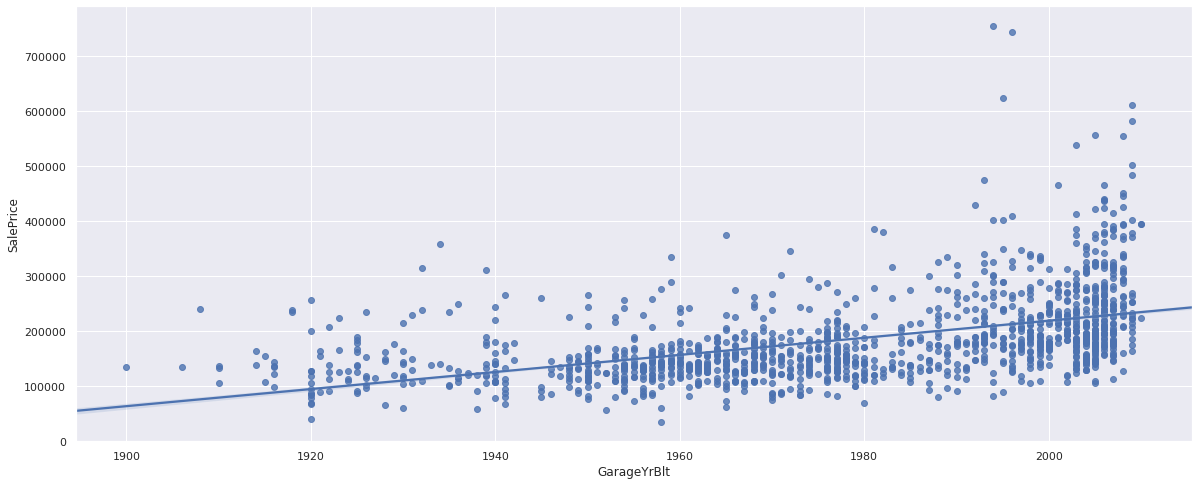

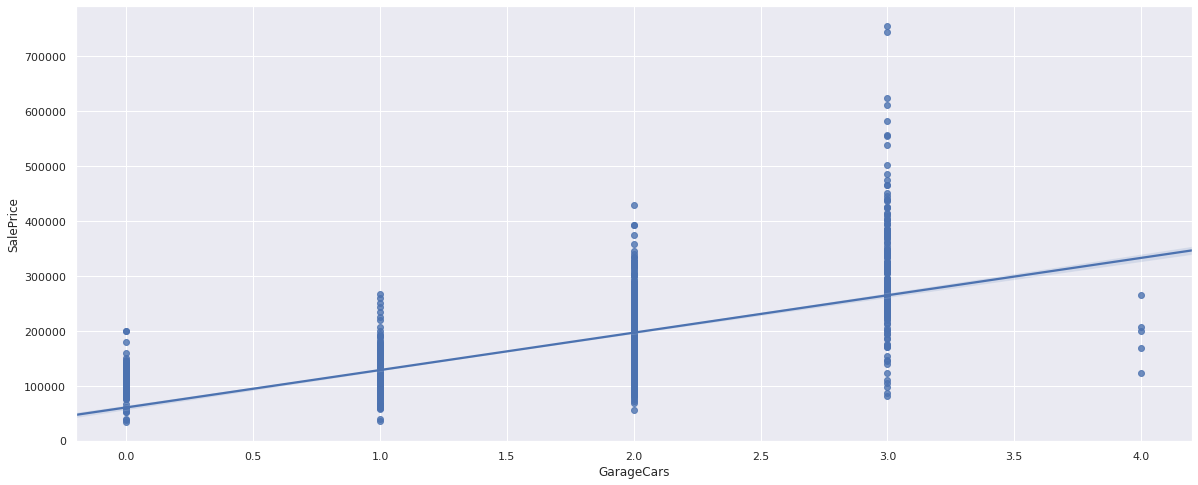

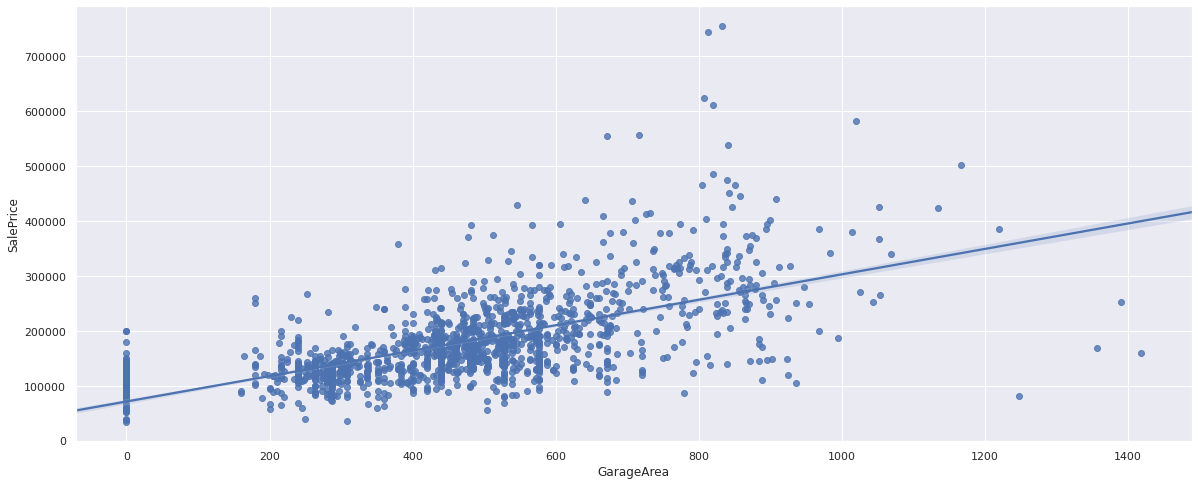

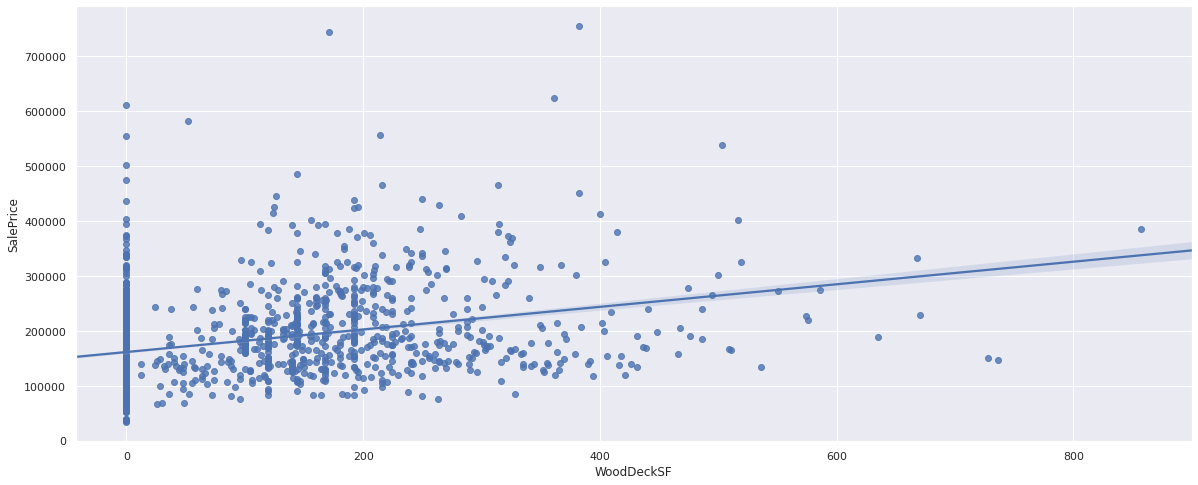

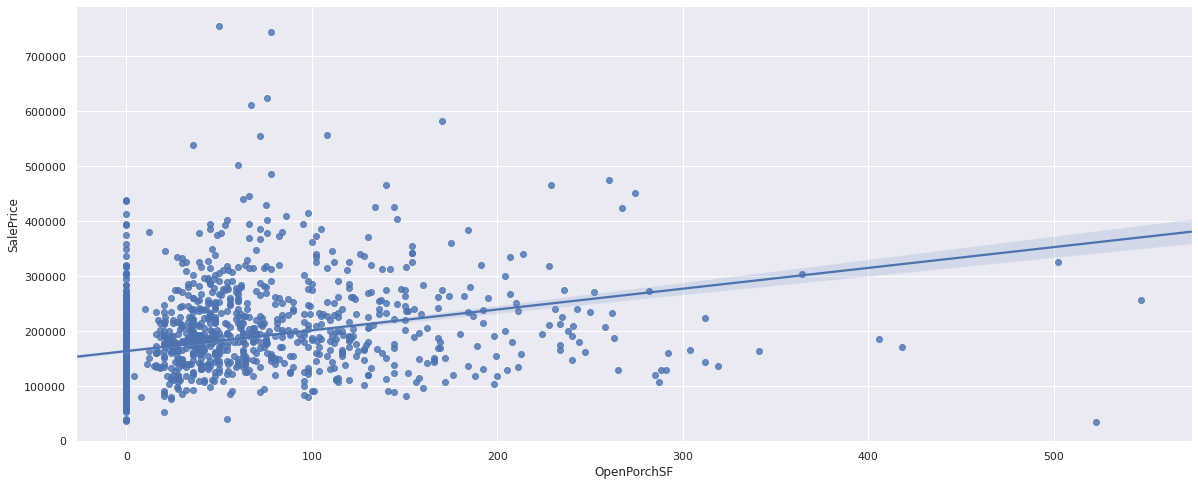

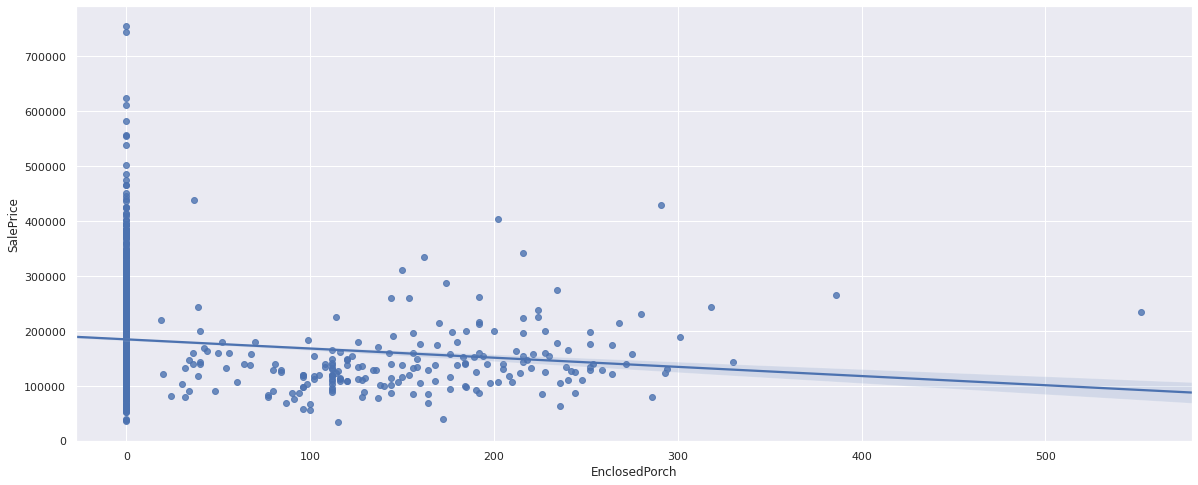

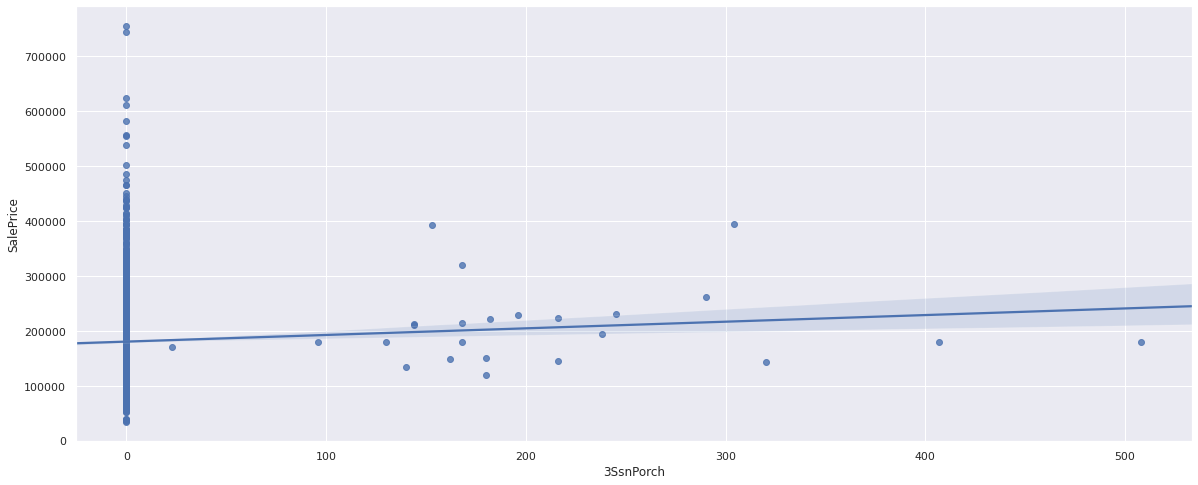

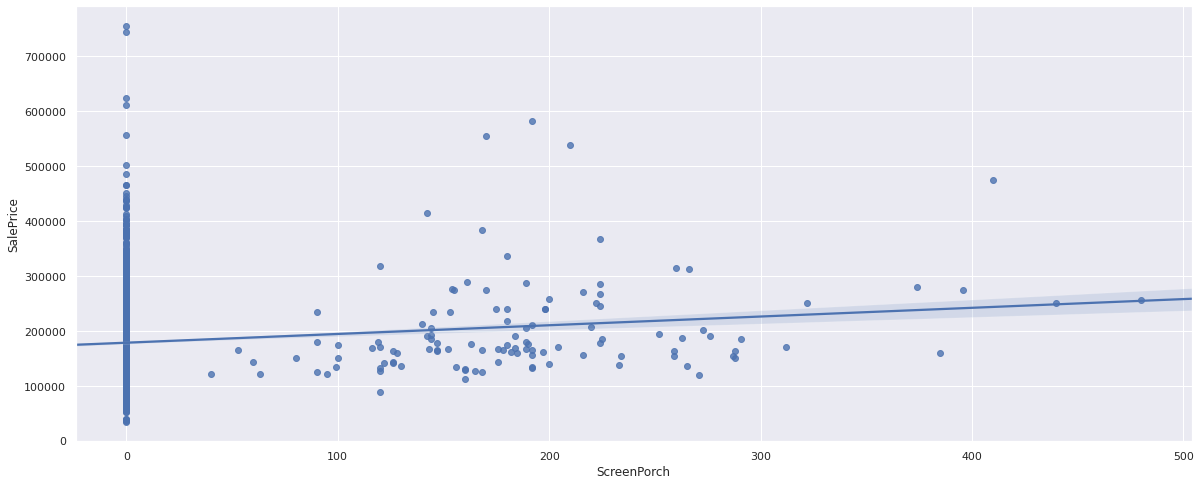

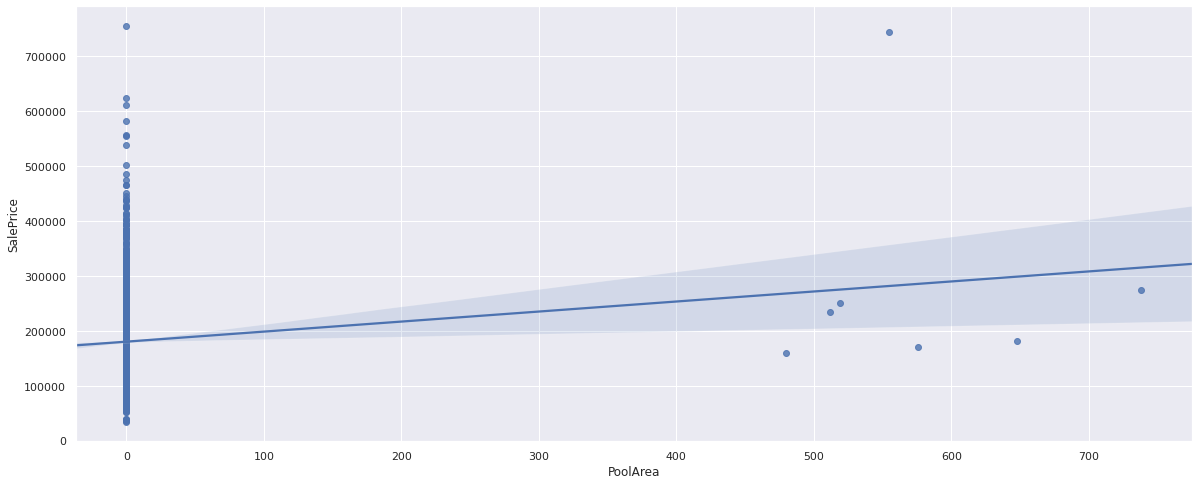

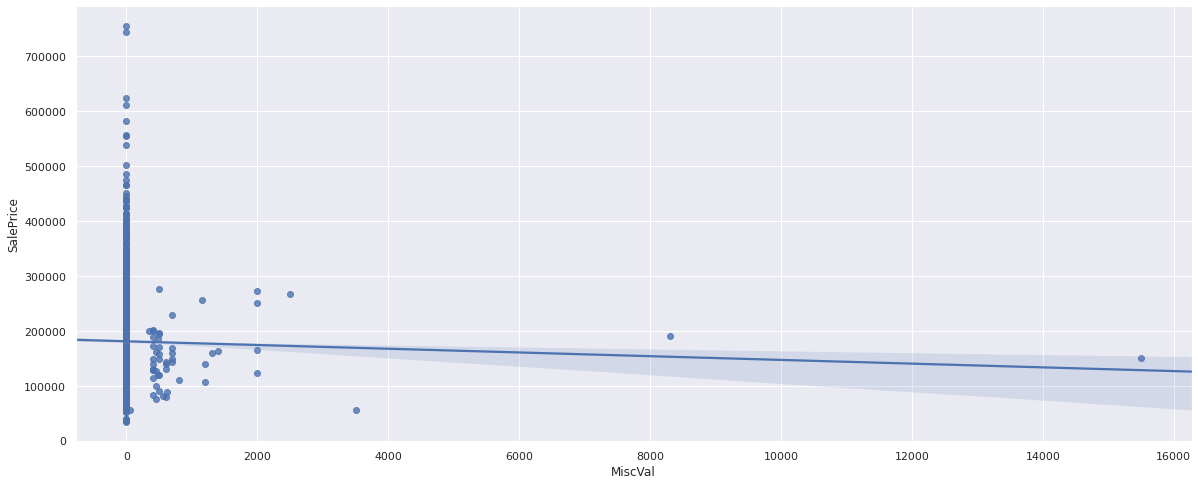

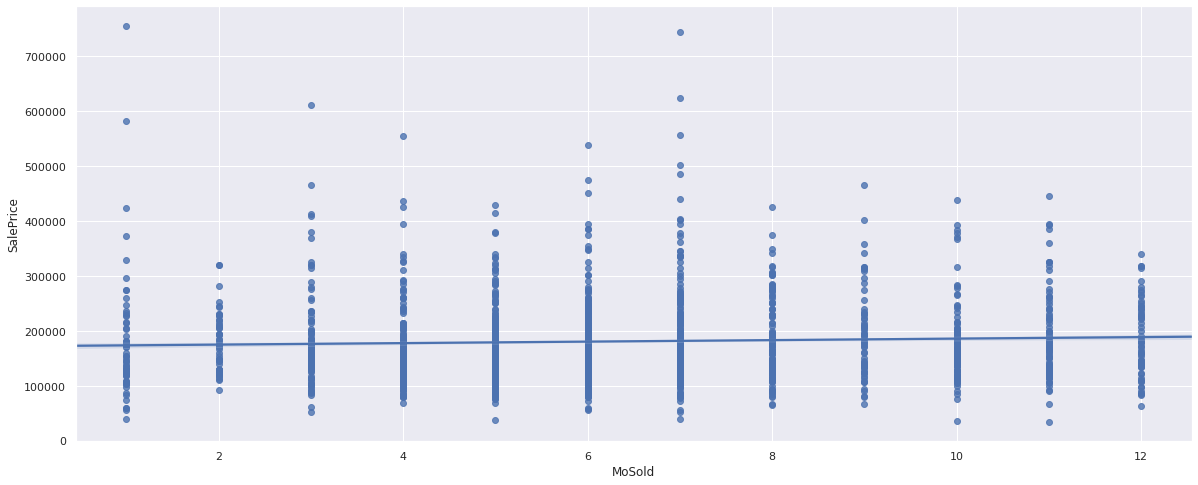

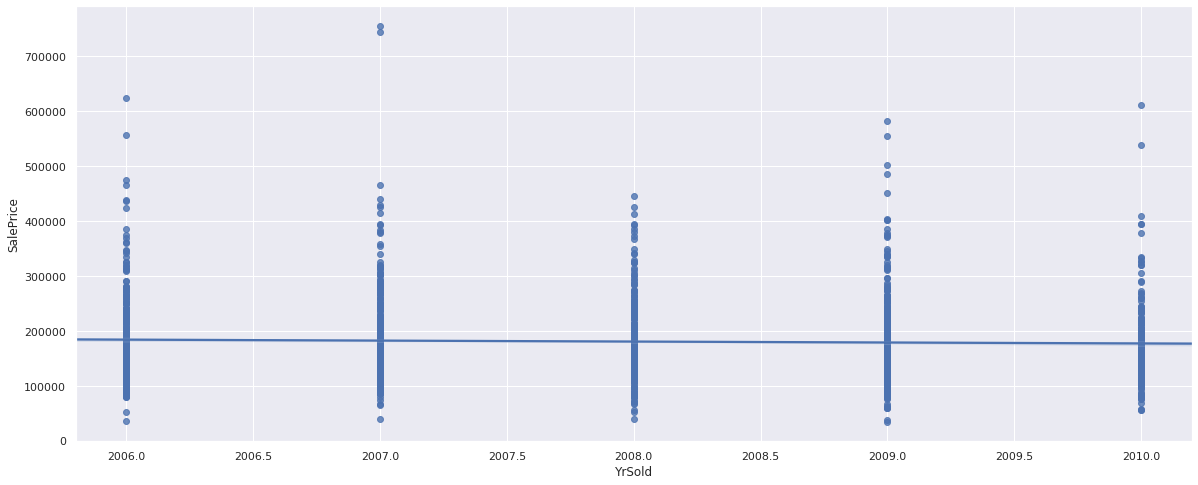

In [ ]:
for i in range(1,len(new_cols.columns)):
  plt.figure(figsize=(20,8))
  sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[i],data=data,scatter=True,fit_reg=True,ci=68, truncate=False)

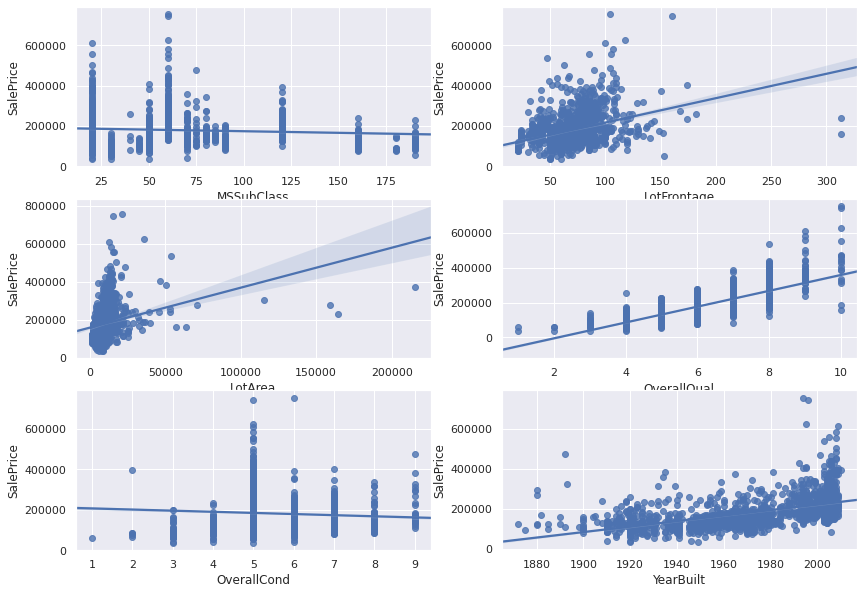

In [ ]:
# fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(nrows=3,ncols=2,figsize=(14,10))
i=1
sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[1],data=data,scatter=True,fit_reg=True,ci=68, truncate=False,ax=ax1)
sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[2],data=data,scatter=True,fit_reg=True,ci=68, truncate=False,ax=ax2)
sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[3],data=data,scatter=True,fit_reg=True,ci=68, truncate=False,ax=ax3)
sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[4],data=data,scatter=True,fit_reg=True,ci=68, truncate=False,ax=ax4)
sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[5],data=data,scatter=True,fit_reg=True,ci=68, truncate=False,ax=ax5)
sns.regplot(y=numeric_features['SalePrice'], x=new_cols.columns[6],data=data,scatter=True,fit_reg=True,ci=68, truncate=False,ax=ax6)

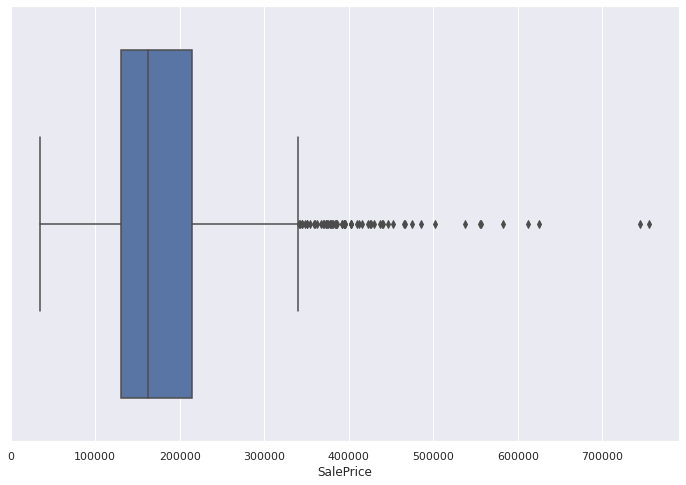

In [ ]:
sns.boxplot(data['SalePrice'])

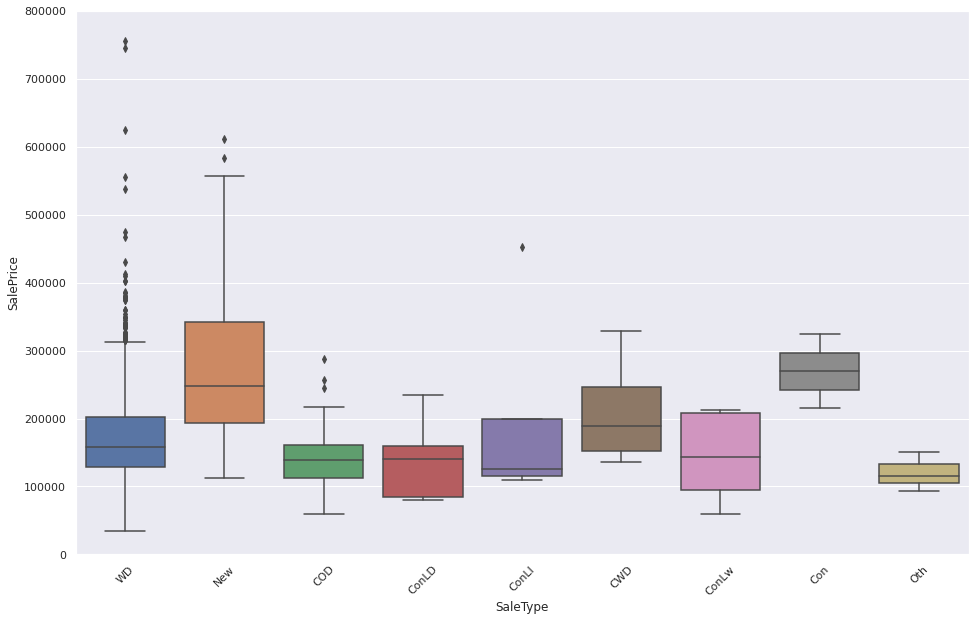

In [ ]:
f,ax=plt.subplots(figsize=(16,10))
fig=sns.boxplot(x='SaleType',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000);
xt=plt.xticks(rotation=45)

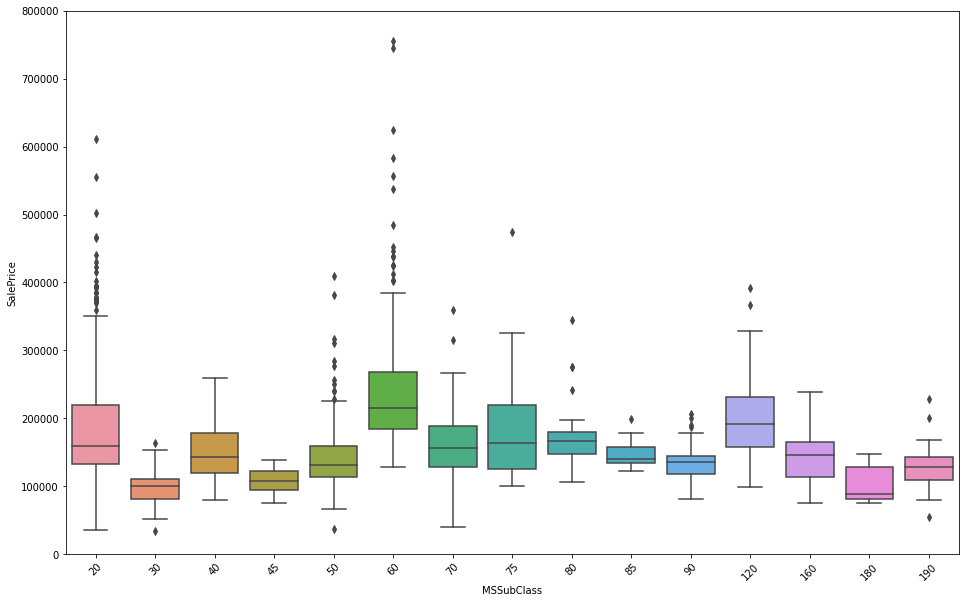

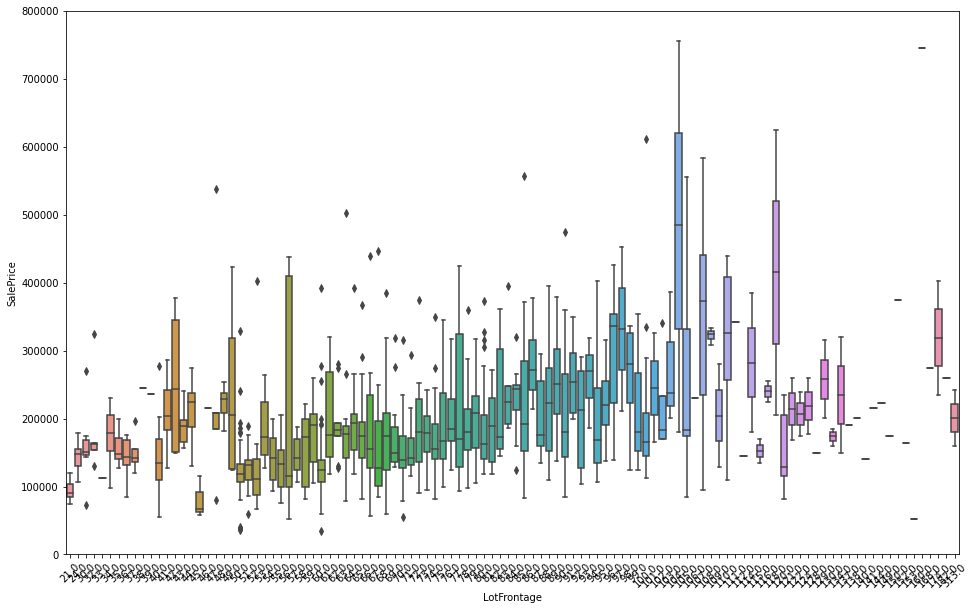

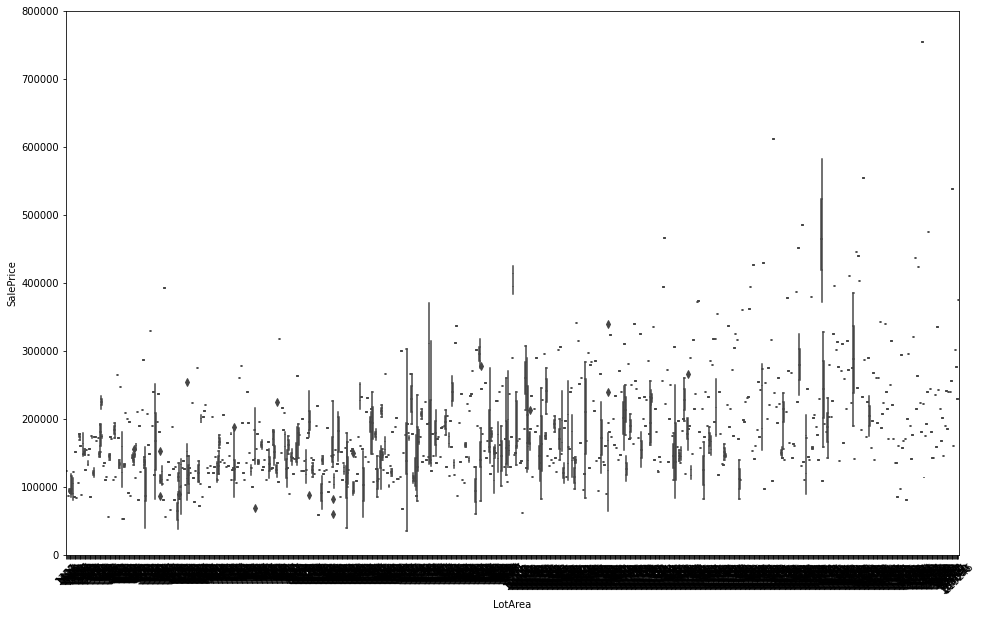

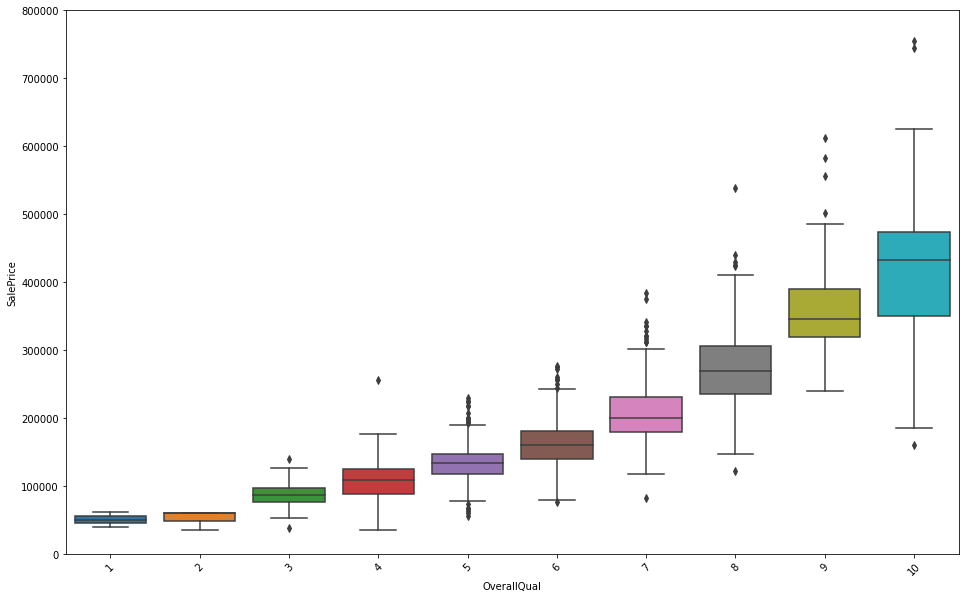

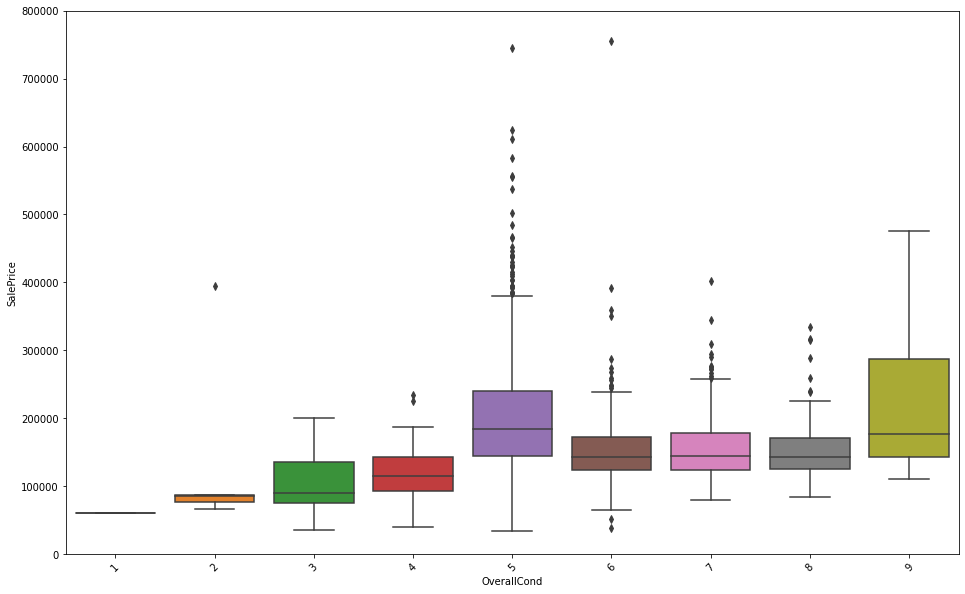

In [ ]:
# for i in range(1,len(new_cols.columns)):
for i in range(1,6):
  f,ax=plt.subplots(figsize=(16,10))
  fig=sns.boxplot(x=new_cols.columns[i],y=numeric_features['SalePrice'],data=data)
  fig.axis(ymin=0,ymax=800000);
  xt=plt.xticks(rotation=45)

In [ ]:
data.shape

(1460, 81)

In [ ]:
Q1=data['SalePrice'].quantile(.25)
Q3=data['SalePrice'].quantile(.75)
IQR=Q3-Q1
# new_boundary=Q3+3*IQR
# data.drop(data[data['SalePrice']>=new_boundary].index,axis=0,inplace=True)

In [ ]:
new_boundary=Q3+3*IQR

In [ ]:
data.drop(data[data['SalePrice']>=new_boundary].index,axis=0,inplace=True)

(1448, 81)

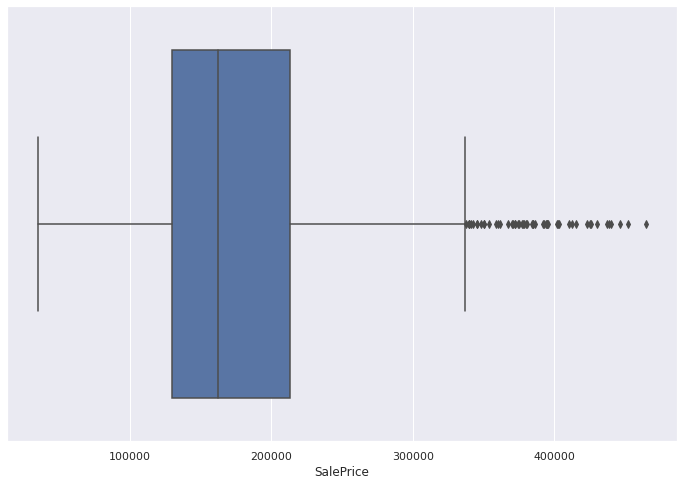

In [ ]:
sns.boxplot(data['SalePrice'])
data.shape

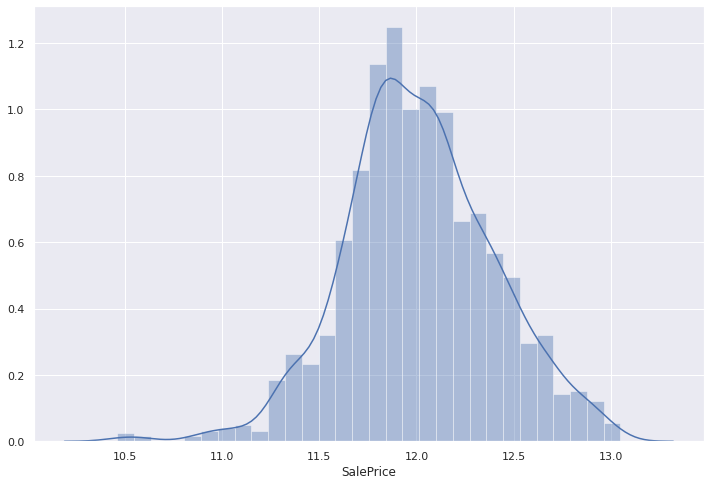

In [ ]:
import numpy as np
target=np.log(data['SalePrice'])
sns.distplot(target)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

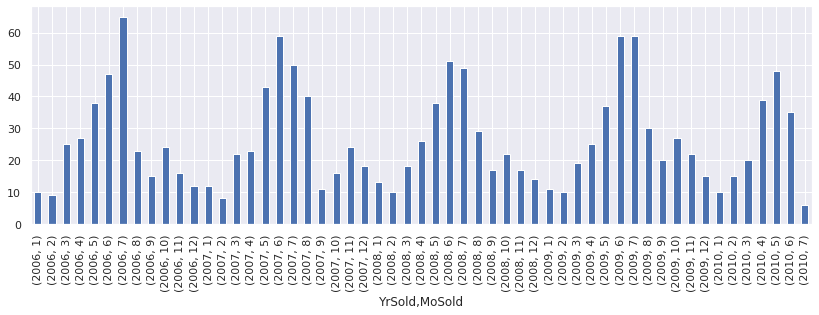

In [ ]:
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar',figsize=(14,4))

Text(0.5, 1.0, 'Location of houses')

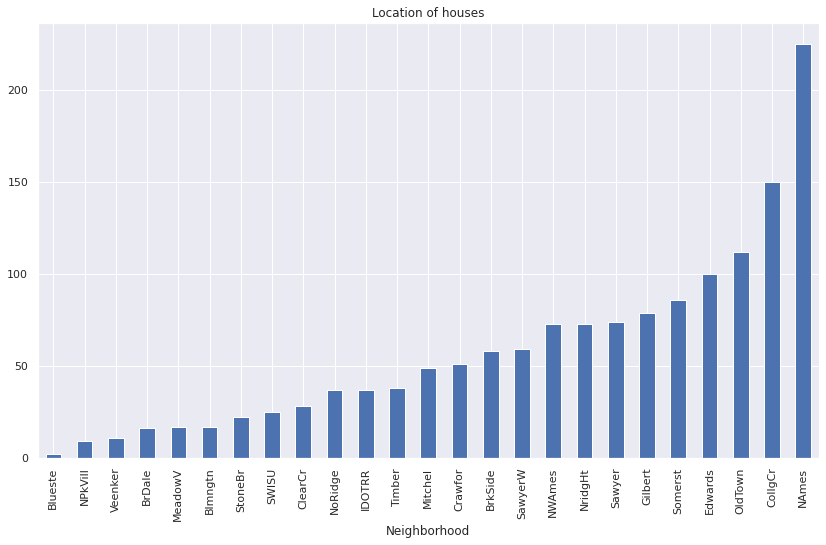

In [ ]:
data.groupby('Neighborhood').Id.count().sort_values().plot(kind='bar',figsize=(14,8))
plt.title('Location of houses')

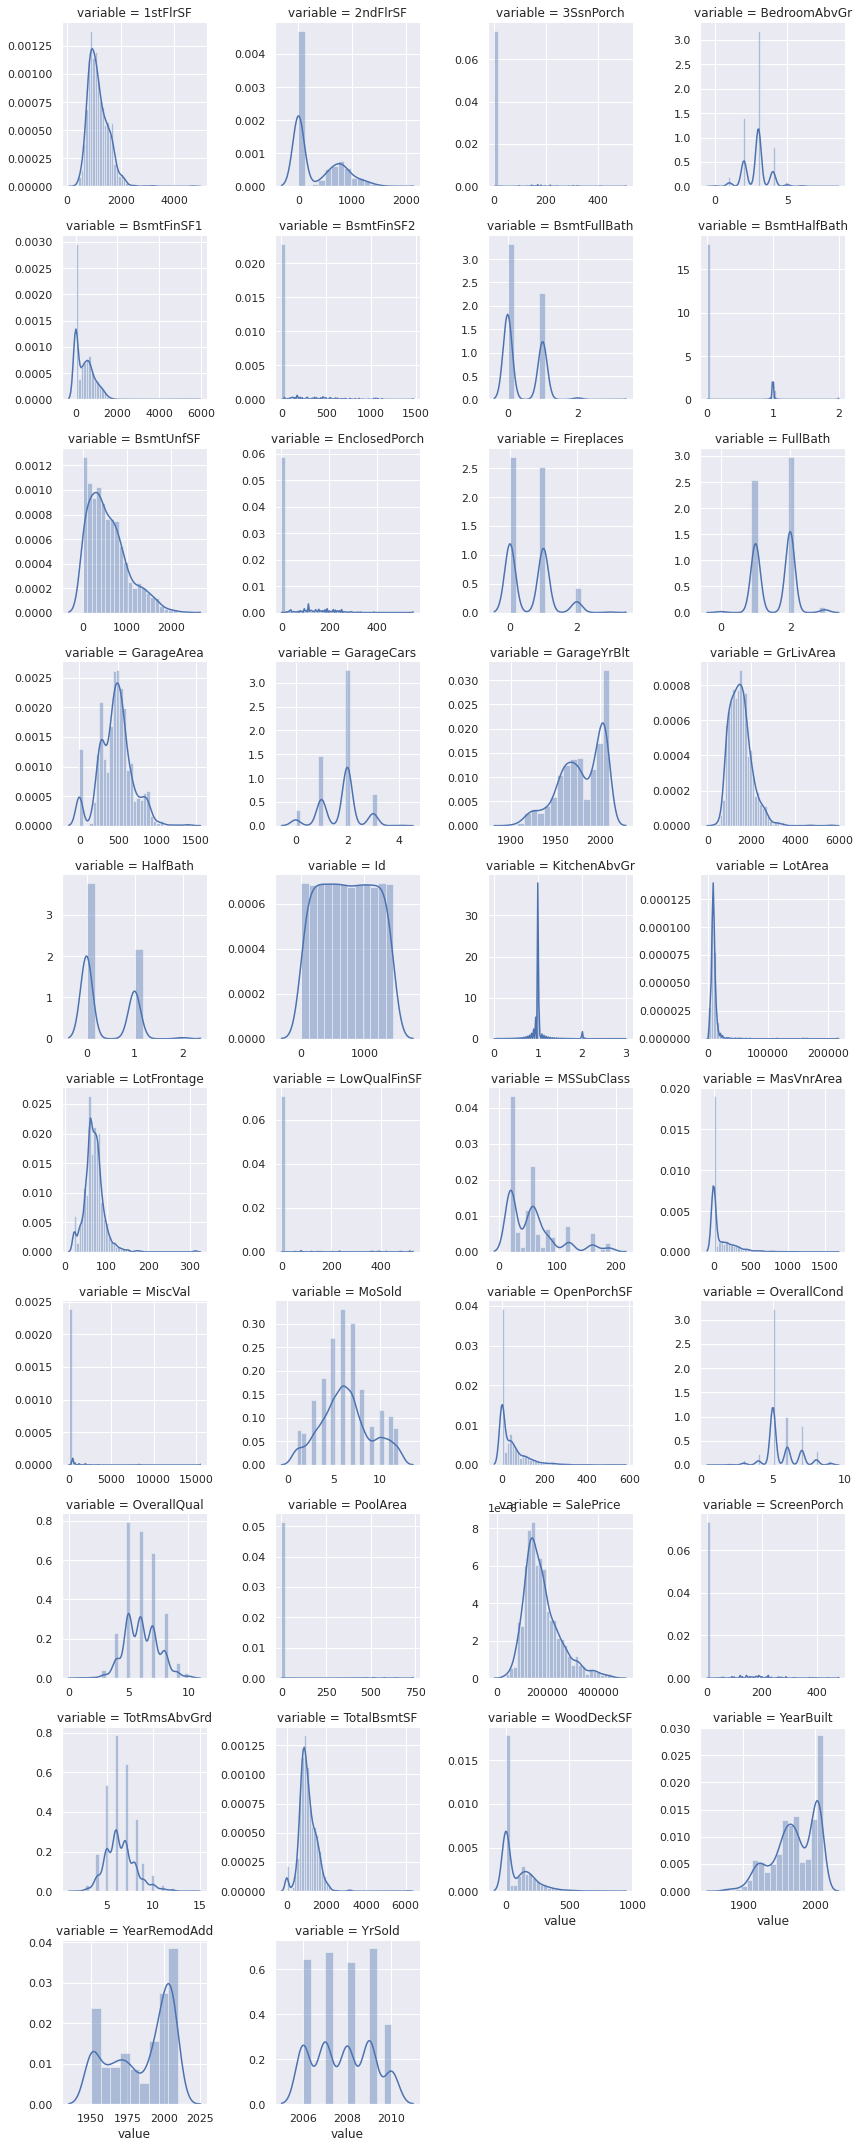

In [ ]:
#Distribution of numeric features
f=pd.melt(data,value_vars=sorted(numeric_features))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g=g.map(sns.distplot,'value')

In [ ]:
#conversion of numeric data to catogory
data['MSSubClass']=data.MSSubClass.apply(lambda x: str(x))
data['MoSold']=data.MoSold.apply(lambda x: str(x))
data['YrSold']=data.YrSold.apply(lambda x: str(x))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


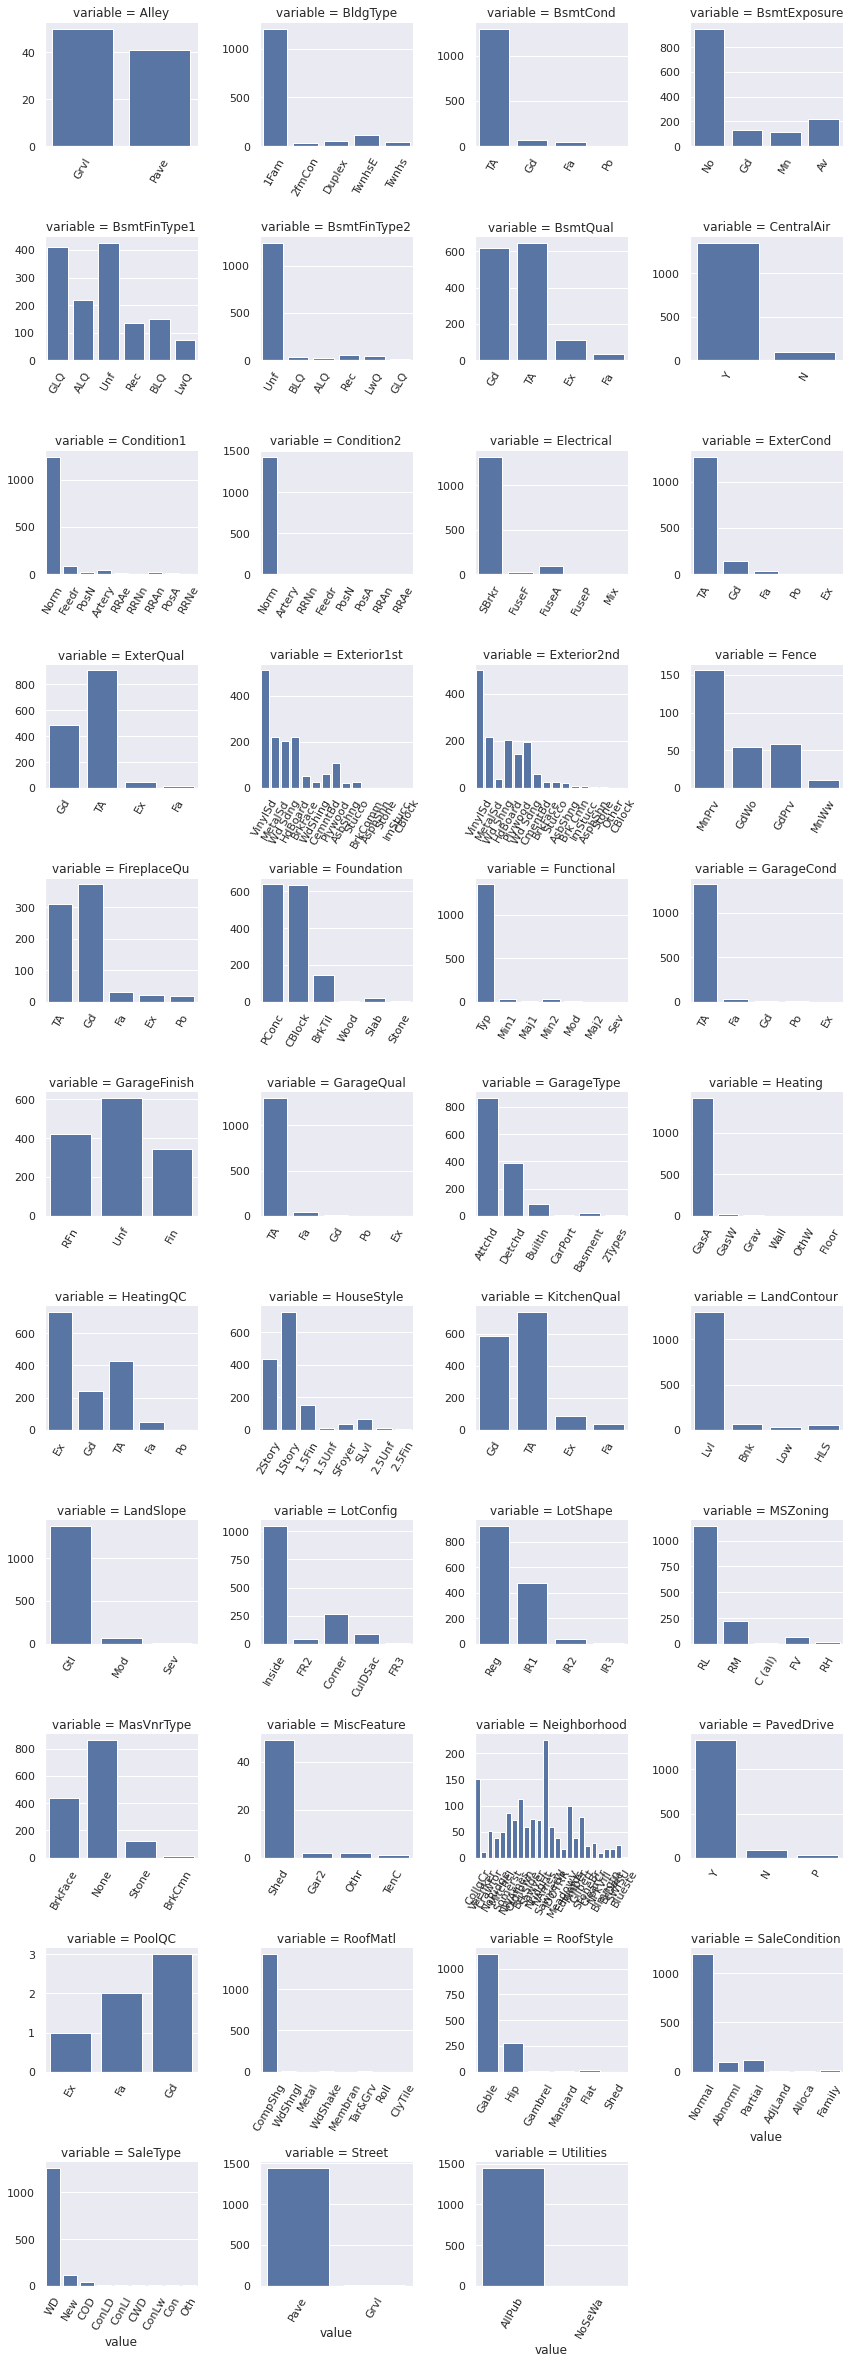

In [ ]:
#Distribution of Catogorical features
f=pd.melt(data,value_vars=sorted(catogorical_features))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation='vertical')
g=g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()

In [ ]:
len(catogorical_features.columns)

43

In [ ]:
catogorical_features=data.select_dtypes(include=[np.object])
len(catogorical_features.columns)

46

In [ ]:
#ANOVA 

In [ ]:
import scipy.stats
cat_features=catogorical_features.columns
data[cat_features]=data[cat_features].fillna('Missing')

anova={'feature':[],'f':[] , 'p':[]}
for cat in cat_features:
  group_prices=[]
  for group in data[cat].unique():
    group_prices.append(data[data[cat] == group]['SalePrice'].values)
  f,p = scipy.stats.f_oneway(*group_prices)
  anova['feature'].append(cat)
  anova['f'].append(f)
  anova['p'].append(p)
anova=pd.DataFrame(anova) 
anova=anova[['feature','f','p']]
anova.sort_values('p',inplace= True)
# anova.reset_index(drop=False)
anova=anova.reset_index(drop=True)
anova['Result'] = anova['p'].apply(lambda x: 'Important' if x < 0.05 else 'Not Important')
anova

,feature,f,p,Result
0,Neighborhood,71.784865,1.558600e-225,Important
1,ExterQual,443.334831,1.439551e-204,Important
2,BsmtQual,316.148635,8.158548e-196,Important
3,KitchenQual,407.806352,3.032213e-192,Important
4,GarageFinish,213.867028,6.228747e-115,Important
5,FireplaceQu,121.075121,2.971217e-107,Important
6,Foundation,100.253851,5.791895e-91,Important
7,GarageType,80.379992,6.117026e-87,Important
8,BsmtFinType1,64.688200,2.386358e-71,Important
9,HeatingQC,88.394462,2.667062e-67,Important


In [ ]:
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

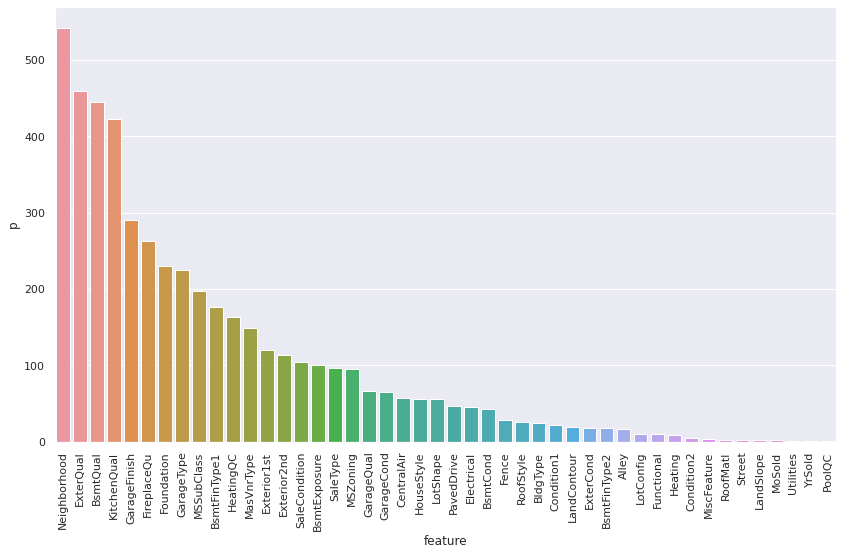

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(anova.feature,np.log(1./anova['p']))

plt.xticks(rotation=90)

In [ ]:
for feature in catogorical_features.columns:
  data.drop(feature, axis=1, inplace=False)
  data = pd.concat([data,pd.get_dummies(data[feature],prefix=f"{feature}")],axis=1)
  data.drop(feature, axis=1, inplace=True)

In [ ]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
test=pd.read_csv('/content/drive/My Drive/houseprice/test.csv')
data1=test

In [ ]:
catogorical_features1=data1.select_dtypes(include=[np.object])
len(catogorical_features1.columns)
catogorical_features1.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
for feature in catogorical_features1.columns:
  data1 = pd.concat([data1,pd.get_dummies(data1[feature],prefix=feature)],axis=1)
  data1.drop(feature, axis=1, inplace=True)

In [ ]:
data1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

In [ ]:
data1.shape

(1459, 271)

Main Model 

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train1=pd.read_csv('/content/drive/My Drive/houseprice/train.csv')
dtrain=train1
test1=pd.read_csv('/content/drive/My Drive/houseprice/test.csv')
dtest=test1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
common_col = (dtrain.columns) & (dtest.columns)
df1 = dtrain[common_col]   # df1.columns: c2, c3, c4
df2 = dtest[common_col] 
catogorical_features1=df1.select_dtypes(include=[np.object])
for feature in catogorical_features1.columns:
  df1 = pd.concat([df1,pd.get_dummies(df1[feature],prefix=feature,drop_first=True)],axis=1)
  df1.drop(feature, axis=1, inplace=True)
catogorical_features2=df2.select_dtypes(include=[np.object])
for feature in catogorical_features2.columns:
  df2 = pd.concat([df2,pd.get_dummies(df2[feature],prefix=feature,drop_first=True)],axis=1)
  df2.drop(feature, axis=1, inplace=True)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


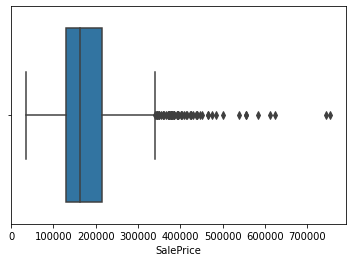

In [ ]:
same_col = (df1.columns) & (df2.columns) 
tr=df1[same_col]
te=df2[same_col]
# missing= tr.isnull().sum()
# missing=(missing[missing>0]).sort_values(ascending=False)
# missing
# # plt.figure(figsize=(15,8))
# # missing.plot.bar()
# missing= te.isnull().sum()
# missing=(missing[missing>0]).sort_values(ascending=False)
# missing
# # plt.figure(figsize=(15,8))
# # missing.plot.bar()
tr['SalePrice']=dtrain['SalePrice']
sns.boxplot(tr['SalePrice'])

In [ ]:
Q1=tr['SalePrice'].quantile(.25)
Q3=tr['SalePrice'].quantile(.75)
IQR=Q3-Q1
new_boundary=Q3+3*IQR
tr.drop(tr[tr['SalePrice']>=new_boundary].index,axis=0,inplace=True)
# missing= tr.isnull().sum()
# missing=(missing[missing>0]).sort_values(ascending=False)
# missing
tr['LotFrontage'] = tr['LotFrontage'].fillna(tr['LotFrontage'].mean())
te['LotFrontage'] = te['LotFrontage'].fillna(tr['LotFrontage'].mean())
tr.drop(['GarageYrBlt'],axis=1,inplace=True)
te.drop(['GarageYrBlt'],axis=1,inplace=True)
tr['MasVnrArea'] = tr['MasVnrArea'].fillna(tr['MasVnrArea'].mean())
te['MasVnrArea'] = te['MasVnrArea'].fillna(tr['MasVnrArea'].mean())
tr['BsmtHalfBath'] = tr['BsmtHalfBath'].fillna(tr['BsmtHalfBath'].mode()[0])
te['BsmtHalfBath'] = te['BsmtHalfBath'].fillna(tr['BsmtHalfBath'].mode()[0])
tr['BsmtFullBath'] = tr['BsmtFullBath'].fillna(tr['BsmtFullBath'].mode()[0])
te['BsmtFullBath'] = te['BsmtFullBath'].fillna(tr['BsmtFullBath'].mode()[0])
te['GarageArea']=te['GarageArea'].fillna(te['GarageArea'].mean())
te['GarageCars']=te['GarageCars'].fillna(te['GarageCars'].mode()[0])
te['TotalBsmtSF']=te['TotalBsmtSF'].fillna(te['TotalBsmtSF'].mode()[0])
te['BsmtUnfSF']=te['BsmtUnfSF'].fillna(te['BsmtUnfSF'].mode()[0])
te['BsmtFinSF2']=te['BsmtFinSF2'].fillna(te['BsmtFinSF2'].mode()[0])
te['BsmtFinSF1']=te['BsmtFinSF1'].fillna(te['BsmtFinSF1'].mode()[0])
trr=tr.drop(columns=['SalePrice','Id'],axis=1)
tee=te.drop(columns='Id',axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
from scipy.stats import zscore
# Standardize ranges
for x in trr: 
  trr[x] = zscore(trr[x])
  tee[x] = zscore(tee[x])
#converting to numpy nd array for neural network model
x = trr[trr.columns].values
y = tr['SalePrice'].values

Neural network model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(170, input_dim=x.shape[1],kernel_initializer='he_uniform', activation='relu')) # Hidden 1
model.add(Dense(200, activation='relu',kernel_initializer='he_uniform')) # Hidden 2
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform')) # Hidden 2
model.add(Dense(1,kernel_initializer='he_uniform')) # Output
model.compile(loss='mean_squared_error', optimizer='Adamax')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
41/41 - 0s - loss: 37261004800.0000 - val_loss: 30829729792.0000
Epoch 2/1000
41/41 - 0s - loss: 37098438656.0000 - val_loss: 30716717056.0000
Epoch 3/1000
41/41 - 0s - loss: 36947886080.0000 - val_loss: 30364467200.0000
Epoch 4/1000
41/41 - 0s - loss: 36157767680.0000 - val_loss: 29547458560.0000
Epoch 5/1000
41/41 - 0s - loss: 34519691264.0000 - val_loss: 27921149952.0000
Epoch 6/1000
41/41 - 0s - loss: 31627075584.0000 - val_loss: 25097211904.0000
Epoch 7/1000
41/41 - 0s - loss: 26769545216.0000 - val_loss: 20803950592.0000
Epoch 8/1000
41/41 - 0s - loss: 20689514496.0000 - val_loss: 15707337728.0000
Epoch 9/1000
41/41 - 0s - loss: 13972298752.0000 - val_loss: 10953495552.0000
Epoch 10/1000
41/41 - 0s - loss: 9203757056.0000 - val_loss: 8333702144.0000
Epoch 11/1000
41/41 - 0s - loss: 7080296960.0000 - val_loss: 6886640128.0000
Epoch 12/1000
41/41 - 0s - loss: 5747370496.0000 - val_loss: 5656485888.0000
Epoch 13/1000
41/41 - 0s - loss: 4565684736.0000 - val_loss: 453032

For Train Model
Final score (MSE): 72270632.91918074
Final score (RMSE): 8501.213614489447
r2: 0.9858824360916424
For Test Model
Final score (MSE): 505970173.80760497
Final score (RMSE): 22493.780780642566
r2: 0.8624274752995361


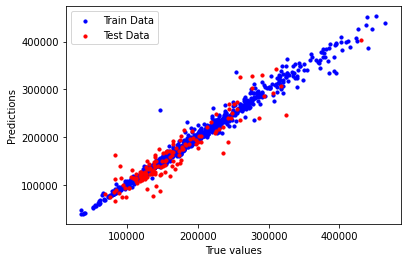

In [ ]:
%matplotlib inline
from sklearn import metrics
# Predict

pred1 = model.predict(x_train)
pred = model.predict(x_test)

# Measure MSE error.
print("For Train Model")  
score = metrics.mean_squared_error(y_train,pred1)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_train,pred1))
print("Final score (RMSE): {}".format(score))
print("r2:",metrics.r2_score(y_train,pred1))

print("For Test Model")
# Predict

# Measure MSE error.  
score = metrics.mean_squared_error(y_test,pred)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test,pred))
print("Final score (RMSE): {}".format(score))
print("r2:",metrics.r2_score(y_test,pred))

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_train,pred1, s=10, c='b', label='Train Data')
ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
plt.legend(loc='upper left');
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)



#Bootstraping

import pandas as pd
import os
import numpy as np
import time
import statistics
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit

SPLITS = 10

# Bootstrap
boot = ShuffleSplit(n_splits=SPLITS, test_size=0.1, random_state=42)

# Track progress
mean_benchmark = []
epochs_needed = []
num = 0

# Loop through samples
for train, test in boot.split(x):
    start_time = time.time()
    num+=1

    # Split train and test
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]

    # Construct neural network
    model = Sequential()
    model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=0, mode='auto', restore_best_weights=True)

    # Train on the bootstrap sample
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=1000)
    epochs = monitor.stopped_epoch
    epochs_needed.append(epochs)
    
    # Predict on the out of boot (validation)
    pred = model.predict(x_test)
  
    # Measure this bootstrap's log loss
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    mean_benchmark.append(score)
    m1 = statistics.mean(mean_benchmark)
    m2 = statistics.mean(epochs_needed)
    mdev = statistics.pstdev(mean_benchmark)
    
    # Record this iteration
    time_took = time.time() - start_time
    print(f"#{num}: score={score:.6f}, mean score={m1:.6f}, stdev={mdev:.6f}, epochs={epochs}, mean epochs={int(m2)}, time={hms_string(time_took)}")

Final score (MSE): 505970173.80760497
Final score (RMSE): 22493.780780642566
0.8624274752995361


Text(0, 0.5, 'Predictions')

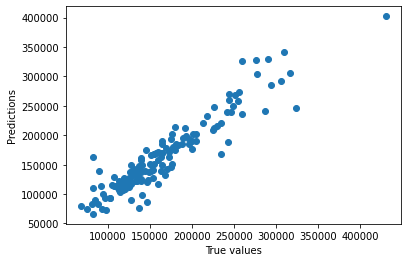

In [ ]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(y_test,pred)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test,pred))
print("Final score (RMSE): {}".format(score))
from sklearn import metrics
print(metrics.r2_score(y_test,pred))
plt.scatter(y_test,pred)
plt.xlabel('True values')
plt.ylabel('Predictions')

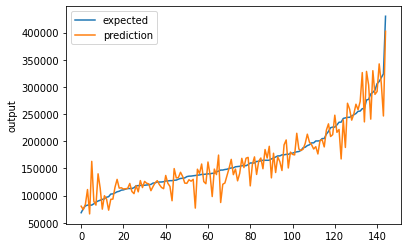

In [ ]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
# Plot the chart
chart_regression(pred.flatten(),y_test)

In [ ]:
pred = model.predict(tee)
res=pd.DataFrame(te['Id'])
res1=pd.DataFrame(pred,columns=['A'])
res['SalePrice']=res1['A']
# res.set_index('Id')
res.head()
# 'col1': [1, 2], 'col2': [3, 4]

,Id,SalePrice
0,1461,131137.968750
1,1462,148908.078125
2,1463,182221.203125
3,1464,192912.953125
4,1465,170500.140625


In [ ]:
res.to_csv('/content/drive/My Drive/houseprice/sub2%.csv',index=False)

NEURAL NETWORK PLM REGRESSION MODEL

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
model = MLPRegressor(hidden_layer_sizes=(300,300,200,500,600,400,200,100,50),
                                 tol=1e-2, max_iter=1400, random_state=600,activation='relu',solver='adam',
                                 early_stopping=True,learning_rate='adaptive', learning_rate_init=0.01)
model.fit(x_train,y_train)

print("For Train Data")
mae=metrics.mean_absolute_error(y_train,model.predict(x_train))
mse=metrics.mean_squared_error(y_train,model.predict(x_train))
r2=metrics.r2_score(y_train,model.predict(x_train))
print(mae,mse,r2)
print("For Test Data")
mae=metrics.mean_absolute_error(y_test,model.predict(x_test))
mse=metrics.mean_squared_error(y_test,model.predict(x_test))
r2=metrics.r2_score(y_test,model.predict(x_test))
print(mae,mse,r2)

For Train Data
9383.749081683345 216337133.80048066 0.9577400502968528
For Test Data
17476.59271489683 570578963.7186681 0.8448604430790032


For Train Model
Final score (MSE): 216337133.80048066
Final score (RMSE): 14708.403509575084
0.9577400502968528
For Test Model
Final score (MSE): 570578963.7186681
Final score (RMSE): 23886.794756071147
0.8448604430790032


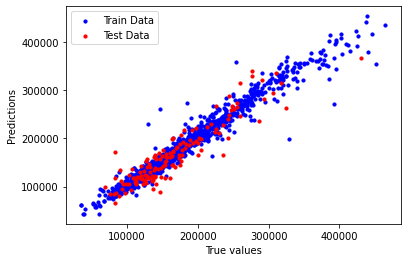

In [ ]:
%matplotlib inline
from sklearn import metrics
# Predict

pred1 = model.predict(x_train)
pred = model.predict(x_test)

# Measure MSE error.
print("For Train Model")  
score = metrics.mean_squared_error(y_train,pred1)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_train,pred1))
print("Final score (RMSE): {}".format(score))
print(metrics.r2_score(y_train,pred1))

print("For Test Model")
# Predict

# Measure MSE error.  
score = metrics.mean_squared_error(y_test,pred)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test,pred))
print("Final score (RMSE): {}".format(score))
print(metrics.r2_score(y_test,pred))


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_train,pred1, s=10, c='b', label='Train Data')
ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.legend(loc='upper left');
plt.show()

Random Tuning Hyper Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
random = RandomizedSearchCV(estimator=MLPRegressor(), param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [ ]:
pred = model.predict(tee)
res=pd.DataFrame(te['Id'])
res1=pd.DataFrame(pred,columns=['A'])
res['SalePrice']=res1['A']
# res.set_index('Id')
res.head()

,Id,SalePrice
0,1461,127501.946749
1,1462,191117.468894
2,1463,197473.516607
3,1464,203609.992520
4,1465,168075.685562


In [ ]:
res.to_csv('/content/drive/My Drive/houseprice/sub_mlp_86.csv',index=False)

Xgboost model

In [ ]:
import xgboost 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
# Create train/test
t1 = trr
t2 = tr['SalePrice']
# x_train, x_test, y_train, y_test = train_test_split(t1, t2, test_size=0.25, random_state=42)
kf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=42) 

for train_index, test_index in kf.split(t1):
      # print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = x[train_index], x[test_index] 
      y_train, y_test = y[train_index], y[test_index]
classifier=xgboost.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 200)      
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

[15:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.12,0.11,0.05],'n_estimators':[100,150,200,250,300]}

tuning = GridSearchCV(estimator=xgboost.XGBRegressor(),param_grid=LR,scoring='r2')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_ 

0.8993575323066256


Text(0, 0.5, 'Predictions')

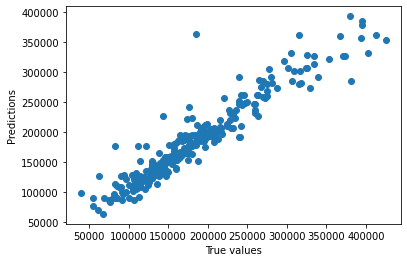

In [ ]:
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [ ]:
y_pred=classifier.predict(tee)
rerr=pd.DataFrame(te['Id'])
rerr1=pd.DataFrame(y_pred,columns=['A'])
rerr['SalePrice']=rerr1['A']
# res.set_index('Id')
rerr.head()

,Id,SalePrice
0,1461,135071.062500
1,1462,162410.421875
2,1463,180921.359375
3,1464,184371.109375
4,1465,188071.906250


In [ ]:
rerr.to_csv('/content/drive/My Drive/houseprice/sub_xg.csv',index=False)

Random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score

# Create train/test
t1 = trr
t2 = tr['SalePrice']
# x_train, x_test, y_train, y_test = train_test_split(t1, t2, test_size=0.25, random_state=42)
kf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=42) 

for train_index, test_index in kf.split(t1):
      # print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = x[train_index], x[test_index] 
      y_train, y_test = y[train_index], y[test_index]
classifier=RandomForestRegressor()      
classifier.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.8702216000891196


Text(0, 0.5, 'Predictions')

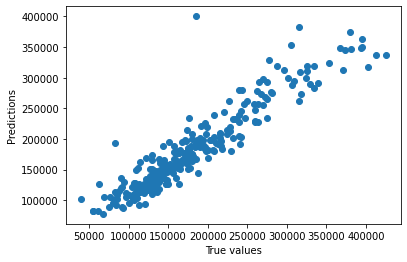

In [ ]:
y_pred=classifier.predict(x_test)
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('Predictions')

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = {'ccp_alpha':[0.15,0.1,0.12,0.11,0.05],'n_estimators':[100,150,200,250,300]}

tuning = GridSearchCV(estimator=RandomForestRegressor(),param_grid=LR,scoring='r2')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_ 

({'ccp_alpha': 0.15, 'n_estimators': 250}, 0.8592279596667387)

In [ ]:
y_pred=classifier.predict(tee)
rerr=pd.DataFrame(te['Id'])
rerr1=pd.DataFrame(y_pred,columns=['A'])
rerr['SalePrice']=rerr1['A']
# res.set_index('Id')
rerr.head()

,Id,SalePrice
0,1461,130315.16
1,1462,158679.50
2,1463,178389.65
3,1464,184604.50
4,1465,197072.19


In [ ]:
rerr.to_csv('/content/drive/My Drive/houseprice/sub_ranfor.csv',index=False)

Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  #for classifier
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
# Create train/test
t1 = trr
t2 = tr['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(t1, t2, test_size=0.2)
# kf=KFold(n_splits=2, random_state=42, shuffle=False)
# for train_index, test_index in kf.split(t1,t2):
#     #  print("TRAIN:", train_index, "TEST:", test_index)
#   x_train, x_test = x[train_index], x[test_index] 
#   y_train, y_test = y[train_index], y[test_index]
# # # Cross-Validate
# #Repeated k fold
# # kf = RepeatedKFold(n_splits=5, n_repeats=100, random_state=10) 

# # for train_index, test_index in kf.split(t1):
# #       # print("Train:", train_index, "Validation:",test_index)
# #       x_train, x_test = x[train_index], x[test_index] 
# #       y_train, y_test = y[train_index], y[test_index]
# # #Stratified k fold
# # StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
# # for train_index, test_index in skf.split(t1, t2):
# #   # print("TRAIN:", train_index, "TEST:", test_index)
# #   x_train, x_test = x[train_index], x[test_index]
# #   y_train, y_test = y[train_index], y[test_index]

# x_train, x_test, y_train, y_test = train_test_split(t1, t2, test_size=0.2)



In [ ]:
gradreg=GradientBoostingRegressor(min_samples_split=50,max_depth=2,n_estimators=210,learning_rate=0.211111)
model=gradreg.fit(x_train,y_train)

For Train Model
Final score (MSE): 146340619.88922113
Final score (RMSE): 12097.132713549154
0.9699696545301811
For Test Model
Final score (MSE): 447512108.8816718
Final score (RMSE): 21154.4820045699
0.9180992748546655


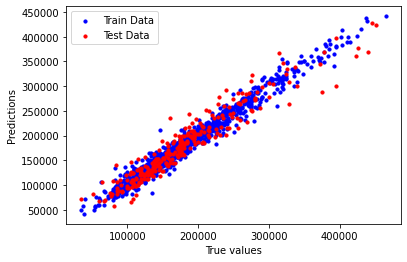

In [ ]:
%matplotlib inline
from sklearn import metrics
# Predict

pred1 = model.predict(x_train)
pred = model.predict(x_test)

# Measure MSE error.
print("For Train Model")  
score = metrics.mean_squared_error(y_train,pred1)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_train,pred1))
print("Final score (RMSE): {}".format(score))
print(metrics.r2_score(y_train,pred1))

print("For Test Model")
# Predict

# Measure MSE error.  
score = metrics.mean_squared_error(y_test,pred)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_test,pred))
print("Final score (RMSE): {}".format(score))
print(metrics.r2_score(y_test,pred))


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_train,pred1, s=10, c='b', label='Train Data')
ax1.scatter(y_test,pred, s=10, c='r', label='Test Data')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.legend(loc='upper left');
plt.show()

In [ ]:
y_pred = model.predict(tee)
rerr=pd.DataFrame(te['Id'])
rerr1=pd.DataFrame(y_pred,columns=['A'])
rerr['SalePrice']=rerr1['A']
rerr.head()

,Id,SalePrice
0,1461,128010.730353
1,1462,157878.026989
2,1463,183175.550068
3,1464,186669.004953
4,1465,195257.729815


In [ ]:
rerr.to_csv('/content/drive/My Drive/houseprice/sub_gradientboost_91.csv',index=False)

# Tuning Hyper parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = {'max_depth':[0.5,5,6,8,10],'learning_rate':[0.01,0.15,0.2,0.3,0.80],'n_estimators':[50,75,115,215,500]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring='r2')
tuning.fit(x_train,y_train)
tuning.best_params_,tuning.best_score_ 

In [ ]:
({'learning_rate': 0.12, 'max_depth': 2, 'n_estimators': 300},
 0.8766793083214612)

In [ ]:
# GradientBoostingRegressor.get_params().keys()
for param in tuning.get_params('self').keys():
    print(param)